In [2]:
library(survivalROC)

In [3]:
data<- read.csv('score.csv',sep=',')
nobs=NROW(data)
data$OS<-data$OS*30
data$DFS<-data$DFS*30
head(data)

,Num,Y1,OS,Y2,DFS,CSOS,CSDFS,RSOS,RSDFS
,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,626,0,337,-0.23863495,-0.26249698,0.11873860,0.2014294
2,2,1,2240,0,948,-0.14046747,-0.10469514,0.07578419,0.1513460
3,3,1,1759,1,1759,-0.23863495,-0.26249698,0.11509943,0.1688970
4,4,1,1756,1,1756,0.07073490,0.05623062,0.16582503,0.3293500
5,5,0,1213,0,413,0.04695314,0.05623062,-0.07379806,-0.2466234
6,6,1,2849,1,2849,-0.23863495,-0.22231370,-0.11292887,-0.0331718


# 2-year OS

### Clinical Score

In [4]:
cutoff=730 #730, 1095, 1825, 2555, 3650
data2= survivalROC(  Stime=data$OS,##生存时间
                     status=data$Y1,## 终止事件    
                     marker = data$CSOS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data2)## list结构

List of 6
 $ cut.values  : num [1:23] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:23] 1 0.783 0.755 0.708 0.363 ...
 $ FP          : num [1:23] 1 0.942 0.932 0.906 0.745 ...
 $ predict.time: num 730
 $ Survival    : num 0.984
 $ AUC         : num 0.258


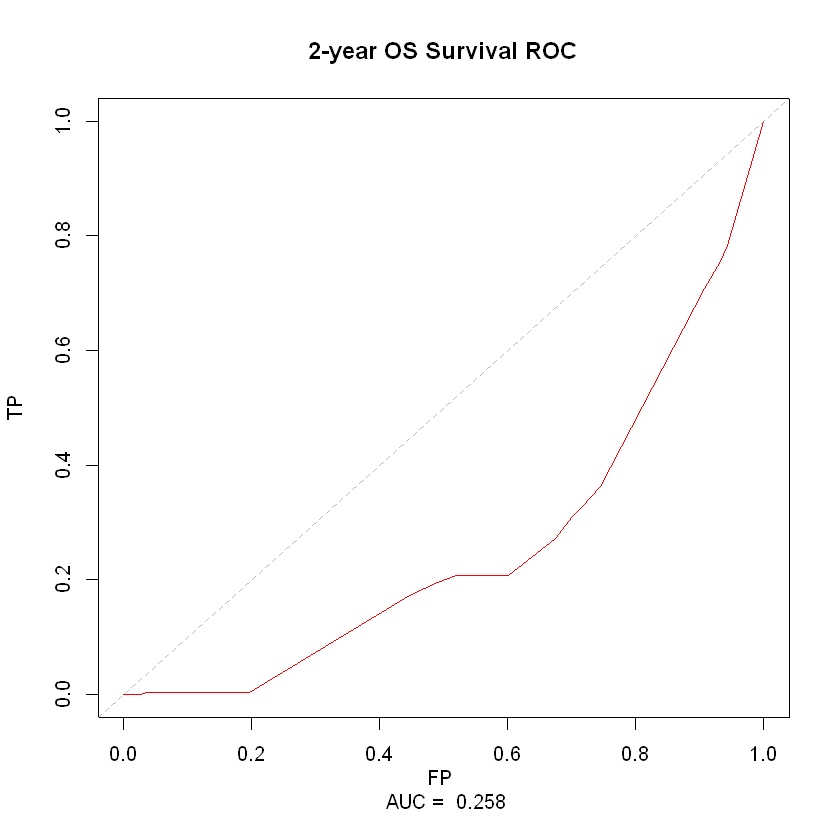

In [5]:
plot(data2$FP, data2$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data2$AUC,3)), ##连接
     ylab="TP",
     main="2-year OS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [6]:
data2= survivalROC(  Stime=data$OS,  
                     status=data$Y1,      
                     marker = data$CSOS,     
                     predict.time =  cutoff, method="KM")
str(data2)

List of 6
 $ cut.values  : num [1:23] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:23] 1 0.663 0.663 0.663 0.329 ...
 $ FP          : num [1:23] 1 0.944 0.934 0.907 0.746 ...
 $ predict.time: num 730
 $ Survival    : num 0.984
 $ AUC         : num 0.239


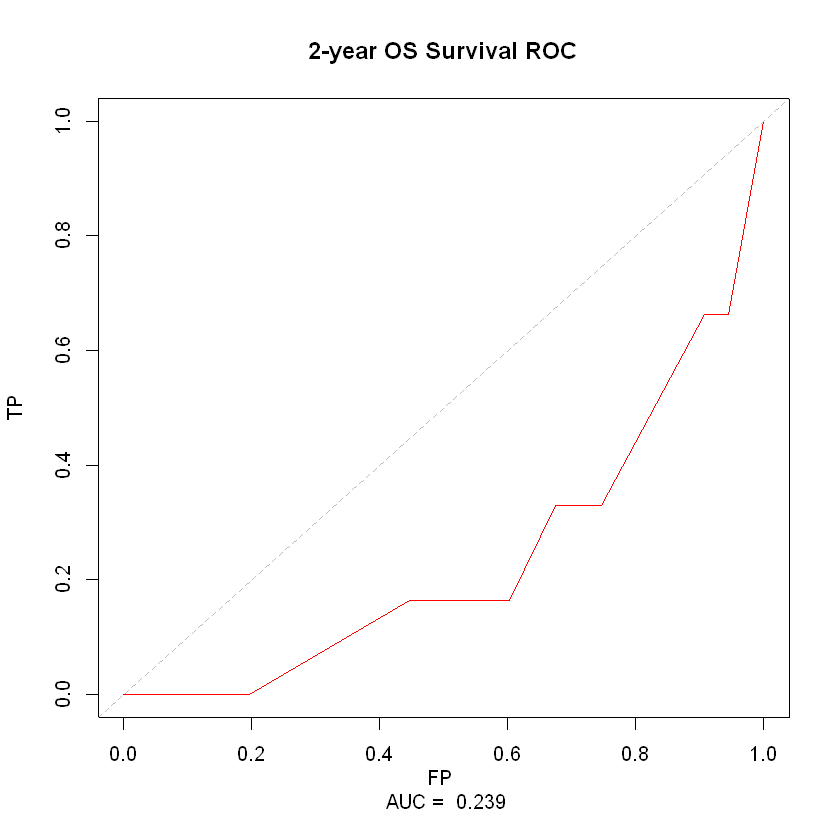

In [7]:
plot(data2$FP, data2$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data2$AUC,3)), 
     ylab="TP",
     main="2-year OS Survival ROC")
abline(0,1,col="gray",lty=2)

### Radiomics Score

In [9]:
data2= survivalROC(  Stime=data$OS,##生存时间
                     status=data$Y1,## 终止事件    
                     marker = data$RSOS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data2)## list结构

List of 6
 $ cut.values  : num [1:384] -Inf -0.572 -0.572 -0.537 -0.525 ...
 $ TP          : num [1:384] 1 0.986 0.973 0.961 0.948 ...
 $ FP          : num [1:384] 1 0.998 0.995 0.993 0.99 ...
 $ predict.time: num 730
 $ Survival    : num 0.984
 $ AUC         : num 0.449


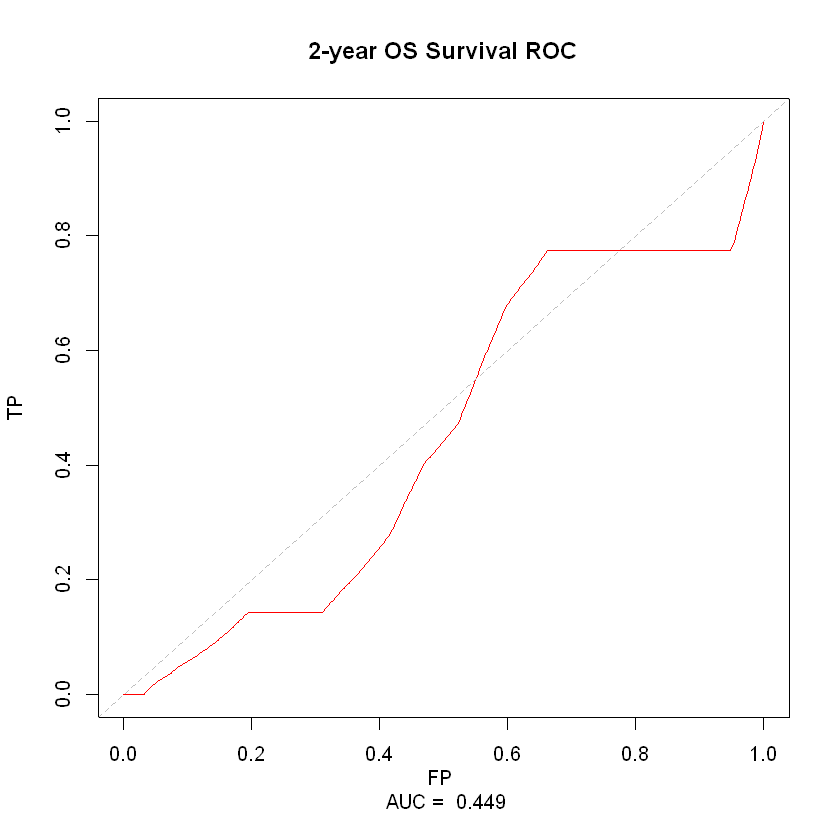

In [10]:
plot(data2$FP, data2$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data2$AUC,3)), ##连接
     ylab="TP",
     main="2-year OS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [11]:
data2= survivalROC(  Stime=data$OS,  
                     status=data$Y1,      
                     marker = data$RSOS,     
                     predict.time =  cutoff, method="KM")
str(data2)

List of 6
 $ cut.values  : num [1:384] -Inf -0.572 -0.572 -0.537 -0.525 ...
 $ TP          : num [1:384] 1 1 1 1 1 ...
 $ FP          : num [1:384] 1 0.997 0.995 0.992 0.989 ...
 $ predict.time: num 730
 $ Survival    : num 0.984
 $ AUC         : num 0.403


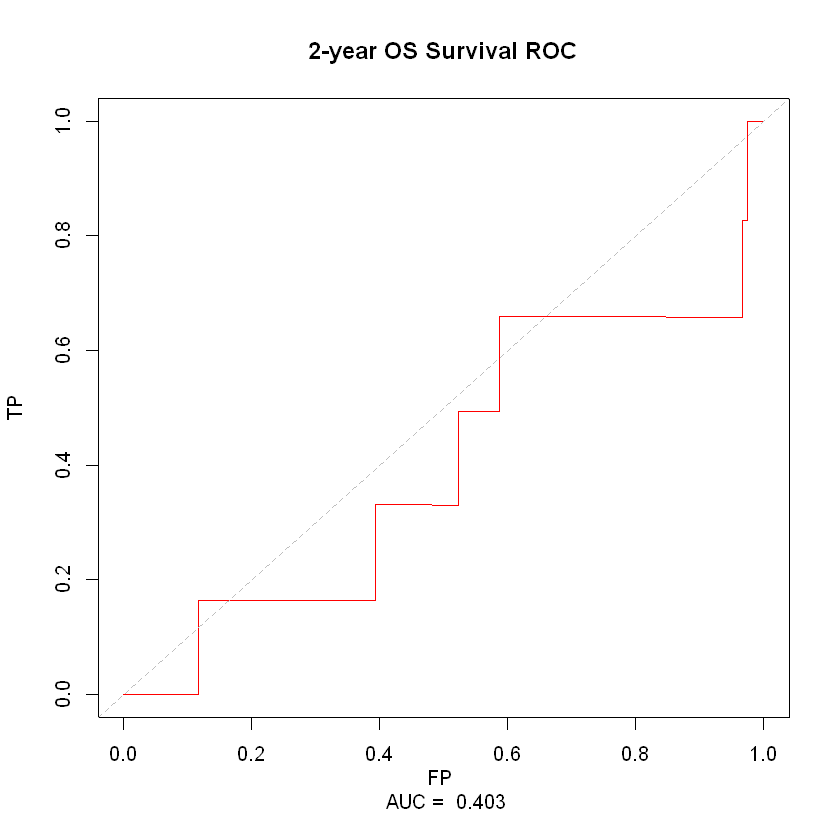

In [12]:
plot(data2$FP, data2$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data2$AUC,3)), 
     ylab="TP",
     main="2-year OS Survival ROC")
abline(0,1,col="gray",lty=2)

# 2-year DFS

### Clinical Score

In [13]:
data2= survivalROC(  Stime=data$DFS,##生存时间
                     status=data$Y2,## 终止事件    
                     marker = data$CSDFS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data2)## list结构

List of 6
 $ cut.values  : num [1:13] -Inf -0.2625 -0.2223 -0.1047 -0.0645 ...
 $ TP          : num [1:13] 1 0.284 0.246 0.246 0.242 ...
 $ FP          : num [1:13] 1 0.765 0.745 0.61 0.6 ...
 $ predict.time: num 730
 $ Survival    : num 0.989
 $ AUC         : num 0.244


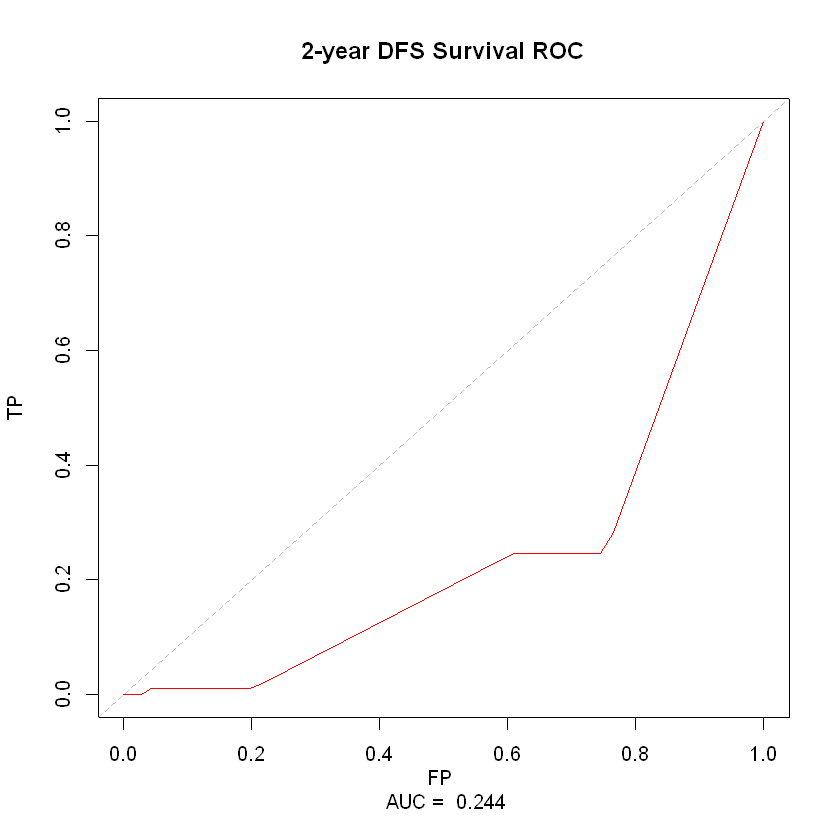

In [14]:
plot(data2$FP, data2$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data2$AUC,3)), ##连接
     ylab="TP",
     main="2-year DFS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [15]:
data2= survivalROC(  Stime=data$DFS,  
                     status=data$Y2,      
                     marker = data$CSDFS,     
                     predict.time =  cutoff, method="KM")
str(data2)

List of 6
 $ cut.values  : num [1:13] -Inf -0.2625 -0.2223 -0.1047 -0.0645 ...
 $ TP          : num [1:13] 1 0.238 0.238 0.238 0.238 ...
 $ FP          : num [1:13] 1 0.766 0.745 0.61 0.599 ...
 $ predict.time: num 730
 $ Survival    : num 0.989
 $ AUC         : num 0.23


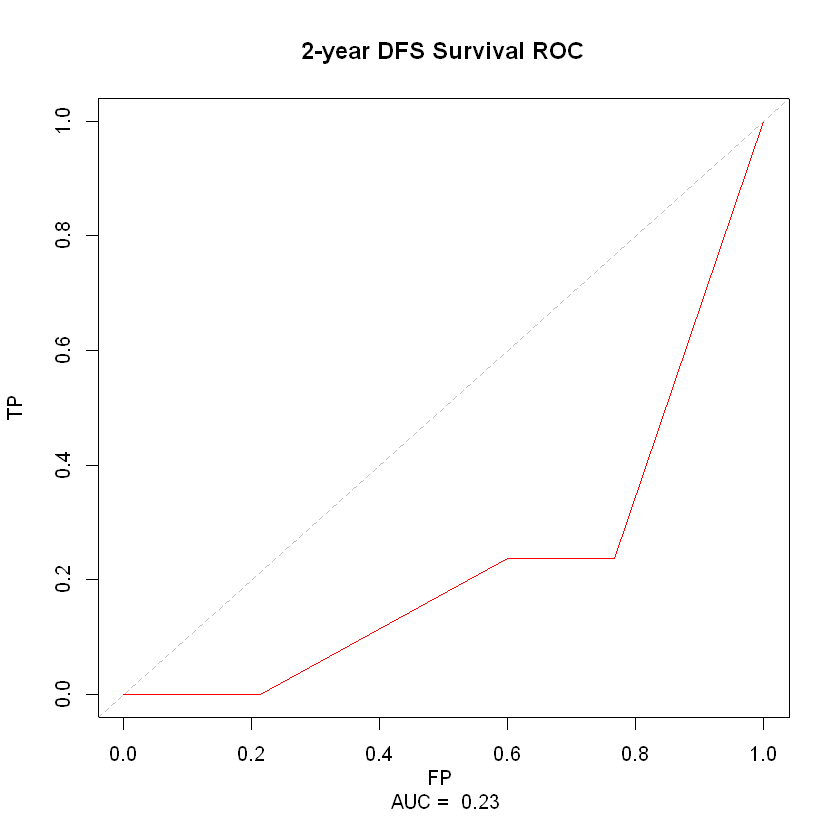

In [16]:
plot(data2$FP, data2$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data2$AUC,3)), 
     ylab="TP",
     main="2-year DFS Survival ROC")
abline(0,1,col="gray",lty=2)

### Radiomics Score

In [17]:
data2= survivalROC(  Stime=data$DFS,##生存时间
                     status=data$Y2,## 终止事件    
                     marker = data$RSDFS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data2)## list结构

List of 6
 $ cut.values  : num [1:384] -Inf -0.795 -0.788 -0.782 -0.746 ...
 $ TP          : num [1:384] 1 0.972 0.946 0.92 0.895 ...
 $ FP          : num [1:384] 1 0.998 0.995 0.993 0.99 ...
 $ predict.time: num 730
 $ Survival    : num 0.989
 $ AUC         : num 0.349


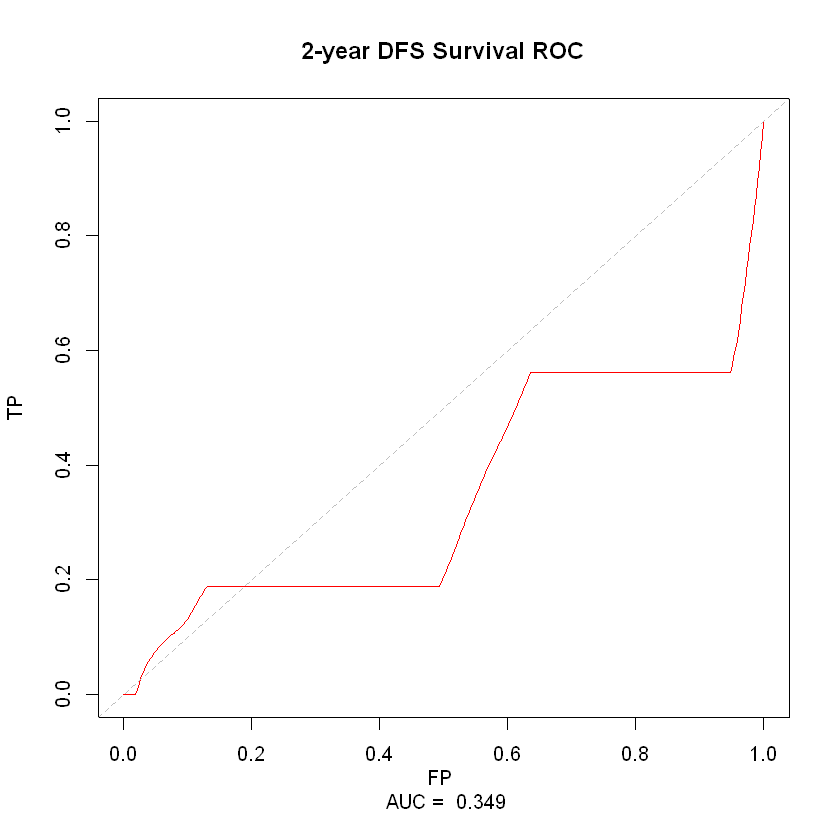

In [18]:
plot(data2$FP, data2$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data2$AUC,3)), ##连接
     ylab="TP",
     main="2-year DFS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [19]:
data2= survivalROC(  Stime=data$DFS,  
                     status=data$Y2,      
                     marker = data$RSDFS,     
                     predict.time =  cutoff, method="KM")
str(data2)

List of 6
 $ cut.values  : num [1:384] -Inf -0.795 -0.788 -0.782 -0.746 ...
 $ TP          : num [1:384] 1 1 1 1 1 ...
 $ FP          : num [1:384] 1 0.997 0.995 0.992 0.989 ...
 $ predict.time: num 730
 $ Survival    : num 0.989
 $ AUC         : num 0.351


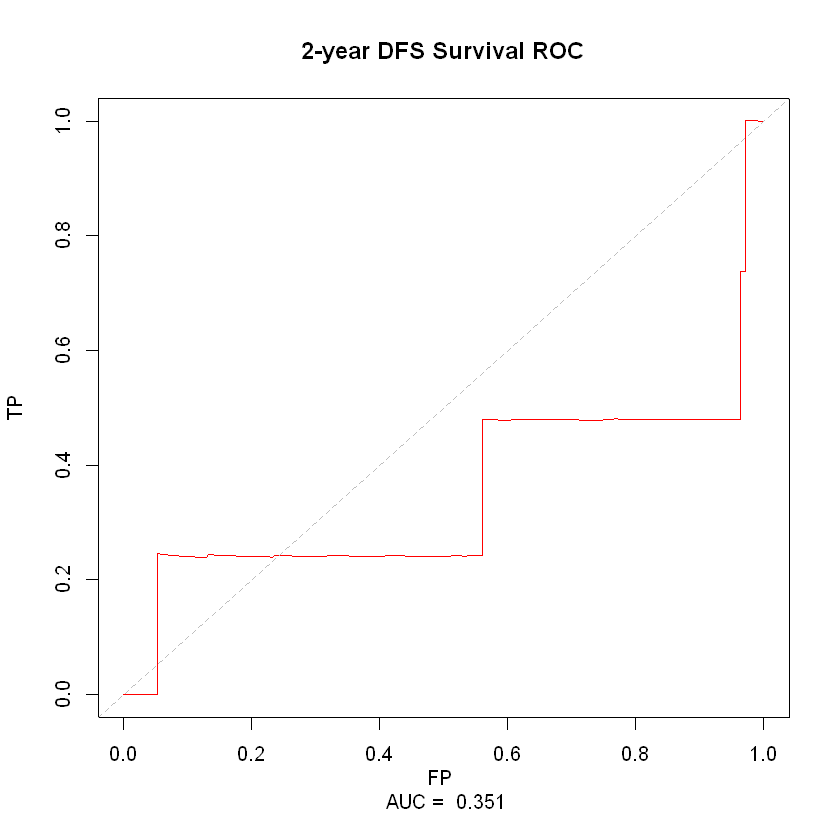

In [20]:
plot(data2$FP, data2$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data2$AUC,3)), 
     ylab="TP",
     main="2-year DFS Survival ROC")
abline(0,1,col="gray",lty=2)

# 3-year OS

### Clinical Score

In [21]:
cutoff=1095 #730, 1095, 1825, 2555, 3650
data3= survivalROC(  Stime=data$OS,##生存时间
                     status=data$Y1,## 终止事件    
                     marker = data$CSOS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data3)## list结构

List of 6
 $ cut.values  : num [1:23] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:23] 1 0.918 0.908 0.889 0.758 ...
 $ FP          : num [1:23] 1 0.942 0.932 0.905 0.737 ...
 $ predict.time: num 1095
 $ Survival    : num 0.911
 $ AUC         : num 0.489


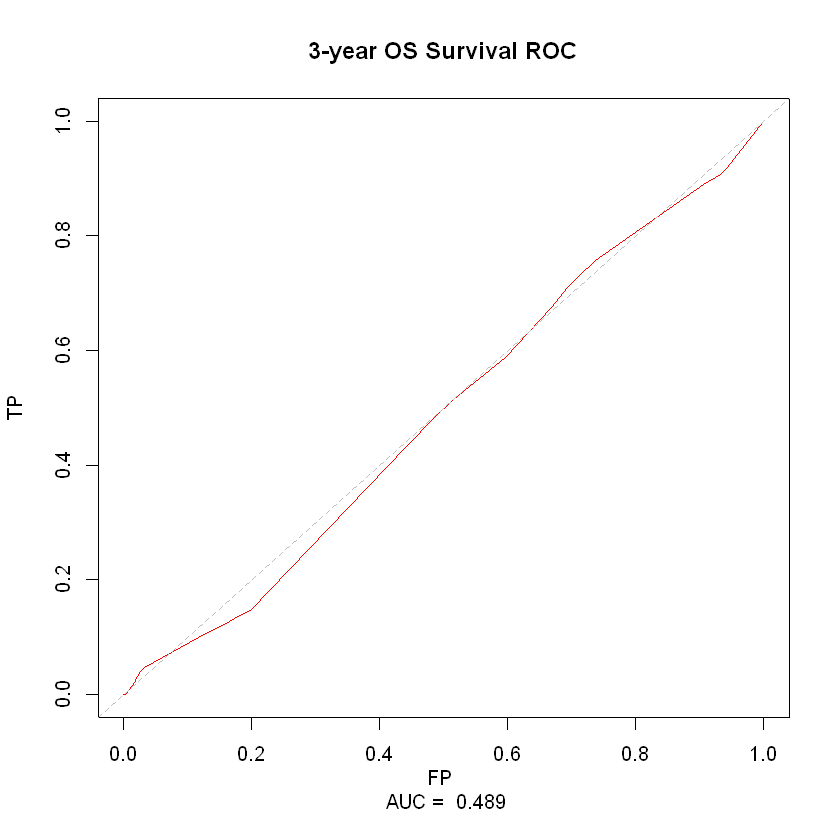

In [22]:
plot(data3$FP, data3$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data3$AUC,3)), ##连接
     ylab="TP",
     main="3-year OS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [23]:
data3= survivalROC(  Stime=data$OS,  
                     status=data$Y1,      
                     marker = data$CSOS,     
                     predict.time =  cutoff, method="KM")
str(data3)

List of 6
 $ cut.values  : num [1:23] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:23] 1 0.873 0.874 0.87 0.738 ...
 $ FP          : num [1:23] 1 0.946 0.935 0.907 0.739 ...
 $ predict.time: num 1095
 $ Survival    : num 0.911
 $ AUC         : num 0.49


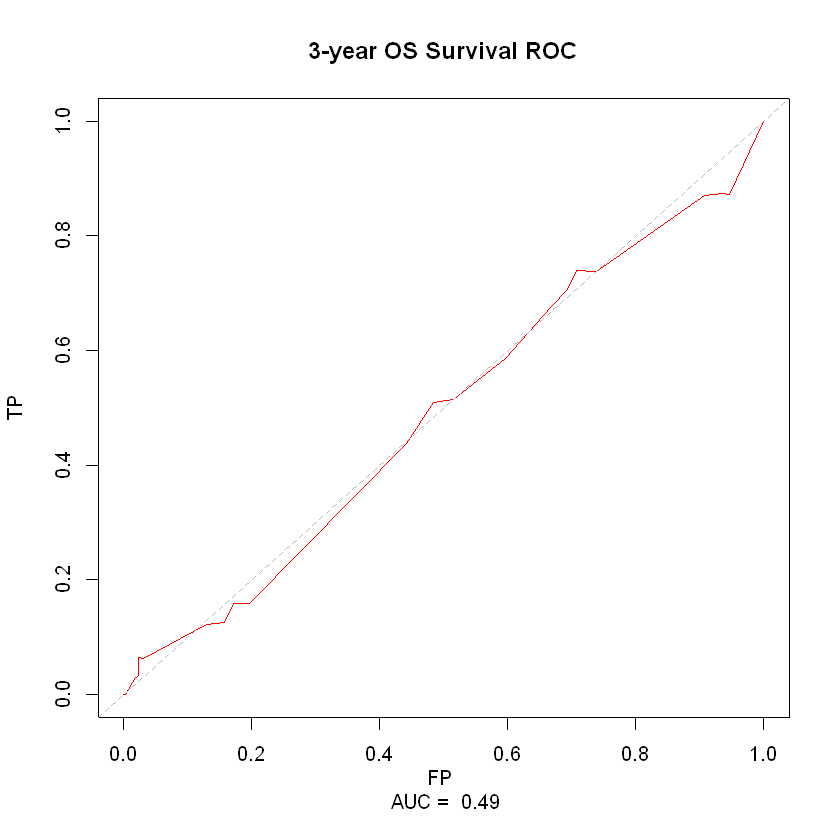

In [24]:
plot(data3$FP, data3$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data3$AUC,3)), 
     ylab="TP",
     main="3-year OS Survival ROC")
abline(0,1,col="gray",lty=2)

### Radiomics Score

In [25]:
cutoff=1095 #730, 1095, 1825, 2555, 3650
data3= survivalROC(  Stime=data$OS,##生存时间
                     status=data$Y1,## 终止事件    
                     marker = data$RSOS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data3)## list结构

List of 6
 $ cut.values  : num [1:384] -Inf -0.572 -0.572 -0.537 -0.525 ...
 $ TP          : num [1:384] 1 0.997 0.994 0.991 0.989 ...
 $ FP          : num [1:384] 1 0.997 0.995 0.992 0.99 ...
 $ predict.time: num 1095
 $ Survival    : num 0.911
 $ AUC         : num 0.545


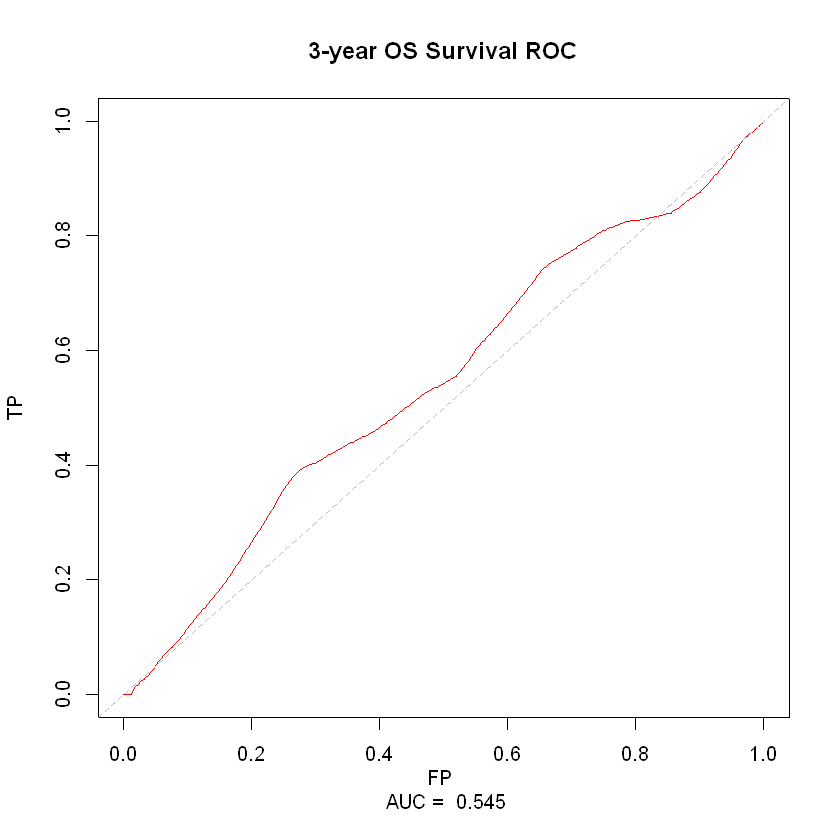

In [26]:
plot(data3$FP, data3$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data3$AUC,3)), ##连接
     ylab="TP",
     main="3-year OS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [27]:
data3= survivalROC(  Stime=data$OS,  
                     status=data$Y1,      
                     marker = data$RSOS,     
                     predict.time =  cutoff, method="KM")
str(data3)

List of 6
 $ cut.values  : num [1:384] -Inf -0.572 -0.572 -0.537 -0.525 ...
 $ TP          : num [1:384] 1 1 1 1 1 ...
 $ FP          : num [1:384] 1 0.997 0.994 0.991 0.988 ...
 $ predict.time: num 1095
 $ Survival    : num 0.911
 $ AUC         : num 0.536


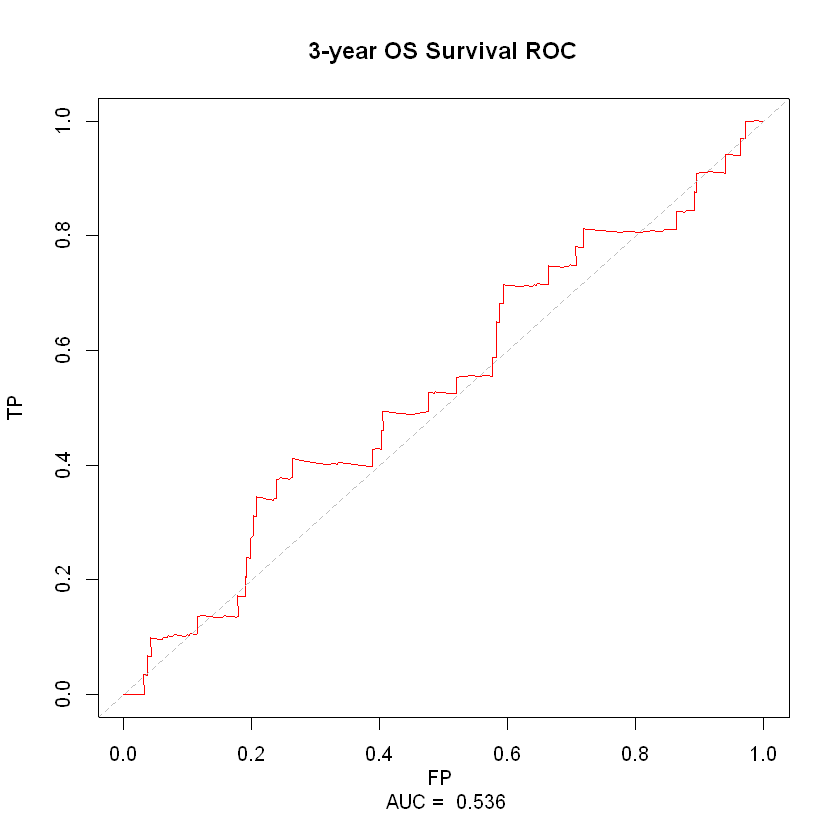

In [28]:
plot(data3$FP, data3$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data3$AUC,3)), 
     ylab="TP",
     main="3-year OS Survival ROC")
abline(0,1,col="gray",lty=2)

# 3-year DFS

### Clinical Score

In [29]:
cutoff=1095 #730, 1095, 1825, 2555, 3650
data3= survivalROC(  Stime=data$DFS,##生存时间
                     status=data$Y2,## 终止事件    
                     marker = data$CSDFS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data3)## list结构

List of 6
 $ cut.values  : num [1:13] -Inf -0.2625 -0.2223 -0.1047 -0.0645 ...
 $ TP          : num [1:13] 1 0.762 0.743 0.616 0.605 ...
 $ FP          : num [1:13] 1 0.76 0.738 0.605 0.594 ...
 $ predict.time: num 1095
 $ Survival    : num 0.912
 $ AUC         : num 0.491


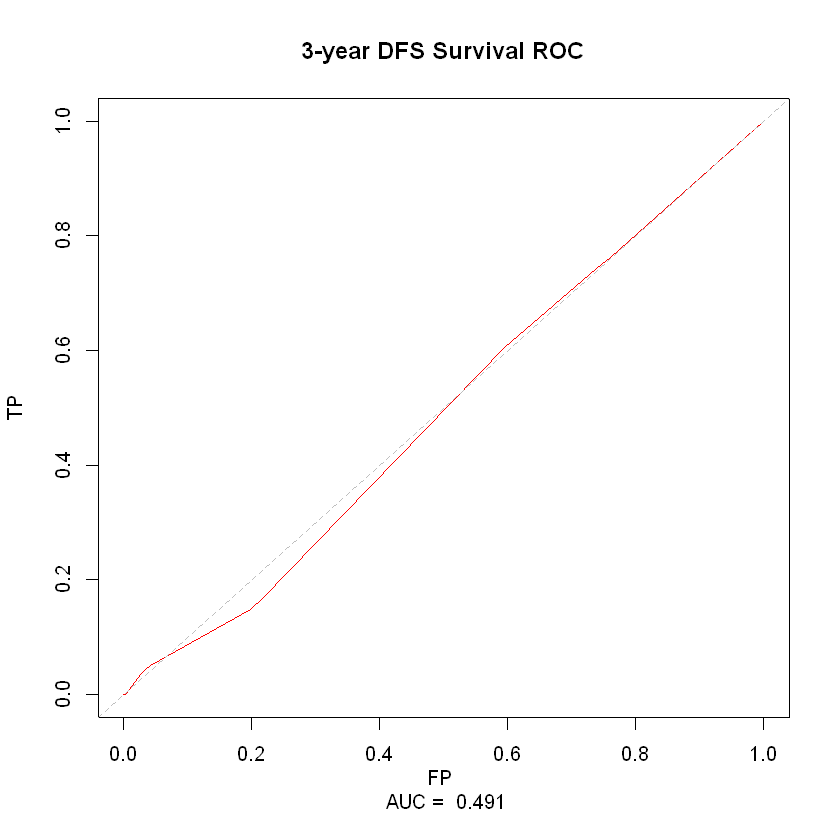

In [30]:
plot(data3$FP, data3$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data3$AUC,3)), ##连接
     ylab="TP",
     main="3-year DFS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [31]:
data3= survivalROC(  Stime=data$DFS,  
                     status=data$Y2,      
                     marker = data$CSDFS,     
                     predict.time =  cutoff, method="KM")
str(data3)

List of 6
 $ cut.values  : num [1:13] -Inf -0.2625 -0.2223 -0.1047 -0.0645 ...
 $ TP          : num [1:13] 1 0.758 0.761 0.634 0.636 ...
 $ FP          : num [1:13] 1 0.76 0.737 0.603 0.591 ...
 $ predict.time: num 1095
 $ Survival    : num 0.912
 $ AUC         : num 0.51


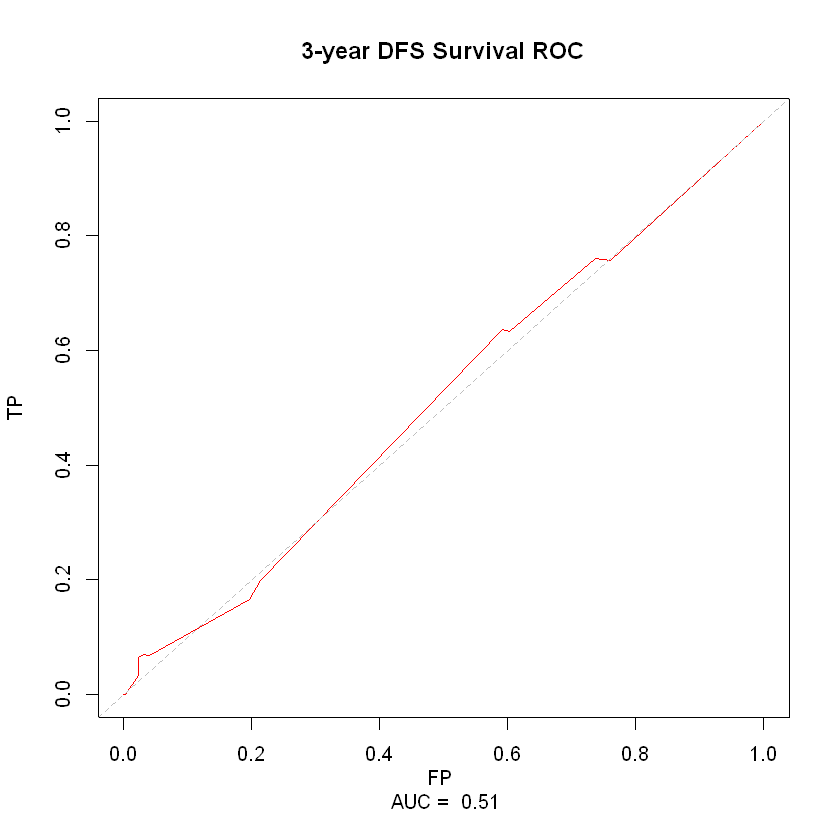

In [32]:
plot(data3$FP, data3$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data3$AUC,3)), 
     ylab="TP",
     main="3-year DFS Survival ROC")
abline(0,1,col="gray",lty=2)

### Radiomics Score

In [33]:
cutoff=1095 #730, 1095, 1825, 2555, 3650
data3= survivalROC(  Stime=data$DFS,##生存时间
                     status=data$Y2,## 终止事件    
                     marker = data$RSDFS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data3)## list结构

List of 6
 $ cut.values  : num [1:384] -Inf -0.795 -0.788 -0.782 -0.746 ...
 $ TP          : num [1:384] 1 0.995 0.99 0.986 0.981 ...
 $ FP          : num [1:384] 1 0.998 0.995 0.993 0.99 ...
 $ predict.time: num 1095
 $ Survival    : num 0.912
 $ AUC         : num 0.51


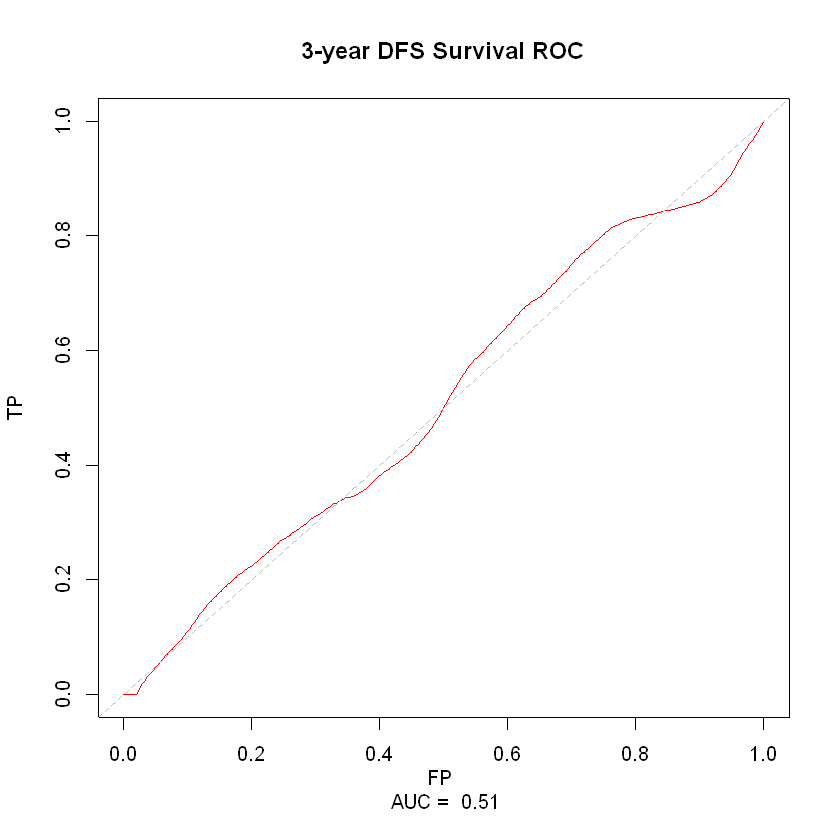

In [34]:
plot(data3$FP, data3$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data3$AUC,3)), ##连接
     ylab="TP",
     main="3-year DFS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [35]:
data3= survivalROC(  Stime=data$DFS,  
                     status=data$Y2,      
                     marker = data$RSDFS,     
                     predict.time =  cutoff, method="KM")
str(data3)

List of 6
 $ cut.values  : num [1:384] -Inf -0.795 -0.788 -0.782 -0.746 ...
 $ TP          : num [1:384] 1 1 1 1 1 ...
 $ FP          : num [1:384] 1 0.997 0.994 0.991 0.988 ...
 $ predict.time: num 1095
 $ Survival    : num 0.912
 $ AUC         : num 0.524


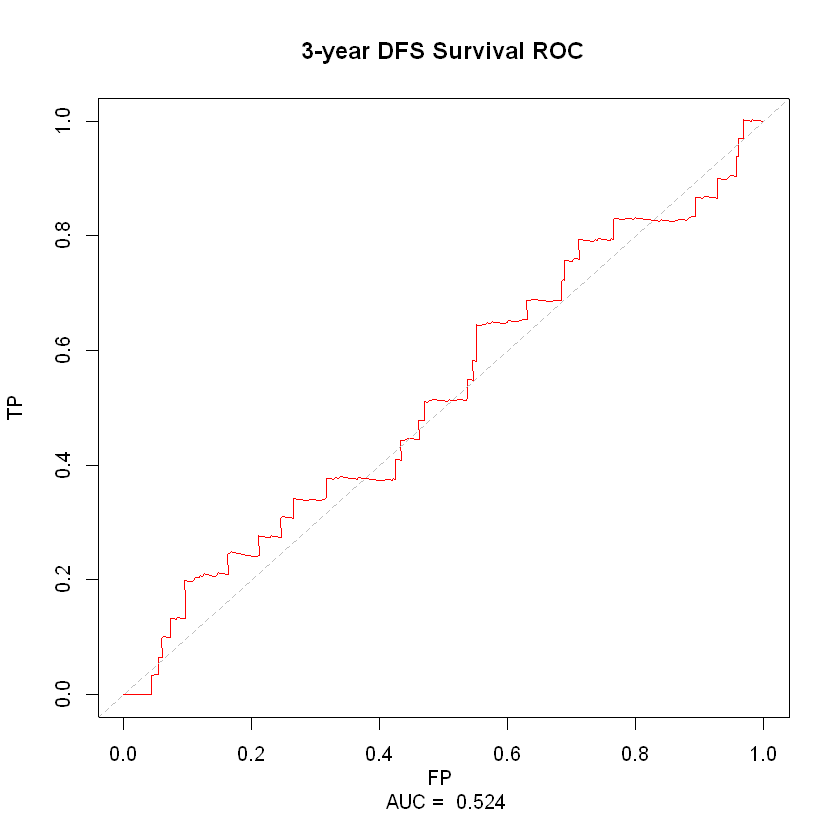

In [36]:
plot(data3$FP, data3$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data3$AUC,3)), 
     ylab="TP",
     main="3-year DFS Survival ROC")
abline(0,1,col="gray",lty=2)

# 5-year OS

### Clinical Score

In [37]:
cutoff=1825 #730, 1095, 1825, 2555, 3650
data5= survivalROC(  Stime=data$OS,##生存时间
                     status=data$Y1,## 终止事件    
                     marker = data$CSOS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data5)## list结构

List of 6
 $ cut.values  : num [1:23] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:23] 1 0.951 0.942 0.919 0.768 ...
 $ FP          : num [1:23] 1 0.931 0.92 0.891 0.716 ...
 $ predict.time: num 1825
 $ Survival    : num 0.549
 $ AUC         : num 0.53


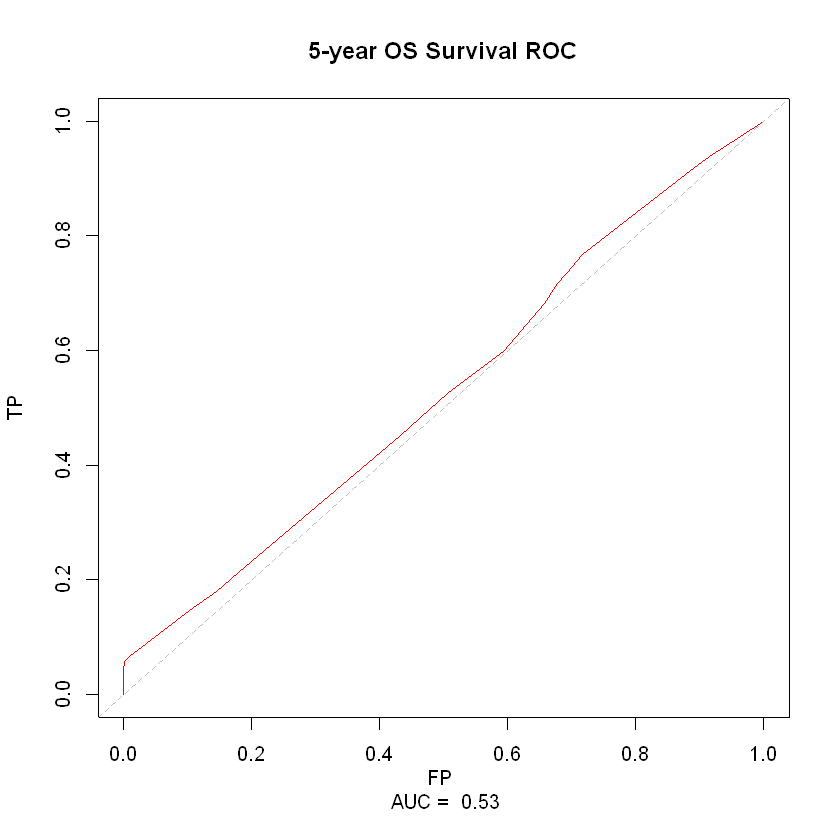

In [38]:
plot(data5$FP, data5$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data5$AUC,3)), ##连接
     ylab="TP",
     main="5-year OS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [39]:
data5= survivalROC(  Stime=data$OS,  
                     status=data$Y1,      
                     marker = data$CSOS,     
                     predict.time =  cutoff, method="KM")
str(data5)

List of 6
 $ cut.values  : num [1:23] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:23] 1 0.938 0.933 0.92 0.772 ...
 $ FP          : num [1:23] 1 0.941 0.926 0.889 0.712 ...
 $ predict.time: num 1825
 $ Survival    : num 0.549
 $ AUC         : num 0.539


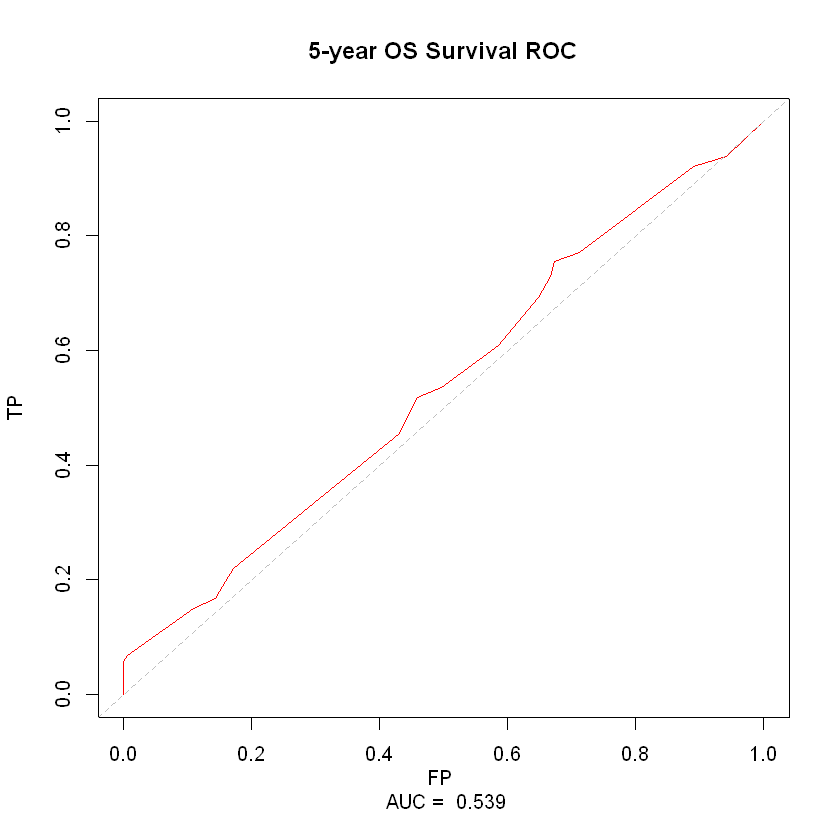

In [40]:
plot(data5$FP, data5$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data5$AUC,3)), 
     ylab="TP",
     main="5-year OS Survival ROC")
abline(0,1,col="gray",lty=2)

### Radiomics Score

In [41]:
cutoff=1825 #730, 1095, 1825, 2555, 3650
data5= survivalROC(  Stime=data$OS,##生存时间
                     status=data$Y1,## 终止事件    
                     marker = data$RSOS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data5)## list结构

List of 6
 $ cut.values  : num [1:384] -Inf -0.572 -0.572 -0.537 -0.525 ...
 $ TP          : num [1:384] 1 0.997 0.995 0.992 0.989 ...
 $ FP          : num [1:384] 1 0.997 0.995 0.993 0.99 ...
 $ predict.time: num 1825
 $ Survival    : num 0.549
 $ AUC         : num 0.573


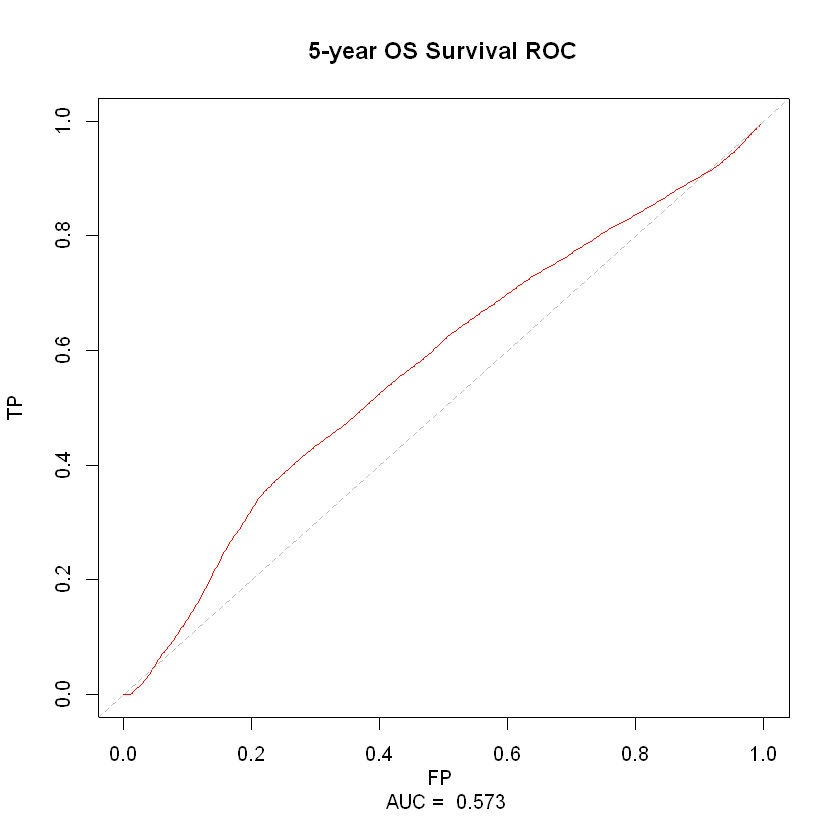

In [42]:
plot(data5$FP, data5$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data5$AUC,3)), ##连接
     ylab="TP",
     main="5-year OS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [43]:
data5= survivalROC(  Stime=data$OS,  
                     status=data$Y1,      
                     marker = data$RSOS,     
                     predict.time =  cutoff, method="KM")
str(data5)

List of 6
 $ cut.values  : num [1:384] -Inf -0.572 -0.572 -0.537 -0.525 ...
 $ TP          : num [1:384] 1 0.994 0.994 0.995 0.995 ...
 $ FP          : num [1:384] 1 1 0.995 0.99 0.985 ...
 $ predict.time: num 1825
 $ Survival    : num 0.549
 $ AUC         : num 0.566


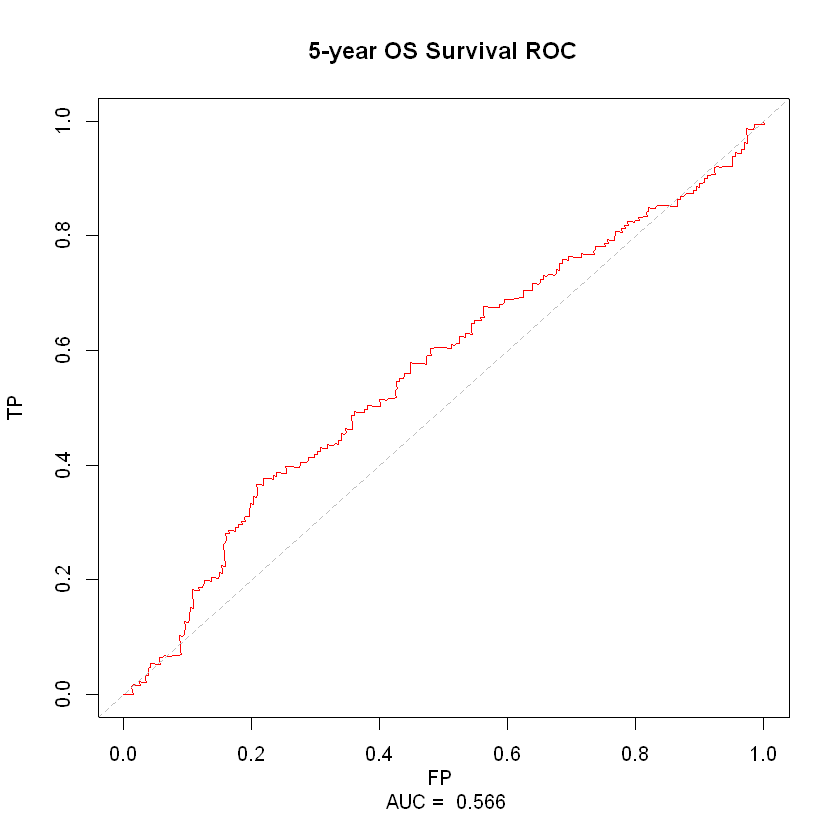

In [44]:
plot(data5$FP, data5$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data5$AUC,3)), 
     ylab="TP",
     main="5-year OS Survival ROC")
abline(0,1,col="gray",lty=2)

# 5-year DFS

### Clinical Score

In [45]:
cutoff=1825 #730, 1095, 1825, 2555, 3650
data5= survivalROC(  Stime=data$DFS,##生存时间
                     status=data$Y2,## 终止事件    
                     marker = data$CSDFS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data5)## list结构

List of 6
 $ cut.values  : num [1:13] -Inf -0.2625 -0.2223 -0.1047 -0.0645 ...
 $ TP          : num [1:13] 1 0.779 0.761 0.626 0.616 ...
 $ FP          : num [1:13] 1 0.743 0.721 0.589 0.578 ...
 $ predict.time: num 1825
 $ Survival    : num 0.556
 $ AUC         : num 0.54


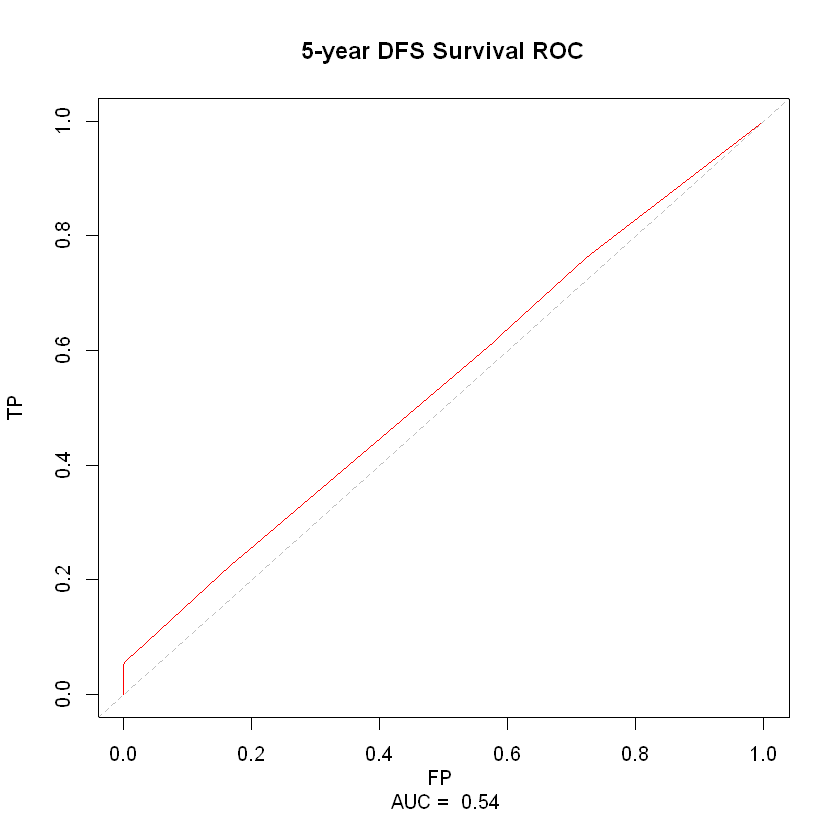

In [46]:
plot(data5$FP, data5$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data5$AUC,3)), ##连接
     ylab="TP",
     main="5-year DFS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [47]:
data5= survivalROC(  Stime=data$DFS,  
                     status=data$Y2,      
                     marker = data$CSDFS,     
                     predict.time =  cutoff, method="KM")
str(data5)

List of 6
 $ cut.values  : num [1:13] -Inf -0.2625 -0.2223 -0.1047 -0.0645 ...
 $ TP          : num [1:13] 1 0.773 0.777 0.64 0.621 ...
 $ FP          : num [1:13] 1 0.749 0.708 0.578 0.575 ...
 $ predict.time: num 1825
 $ Survival    : num 0.556
 $ AUC         : num 0.541


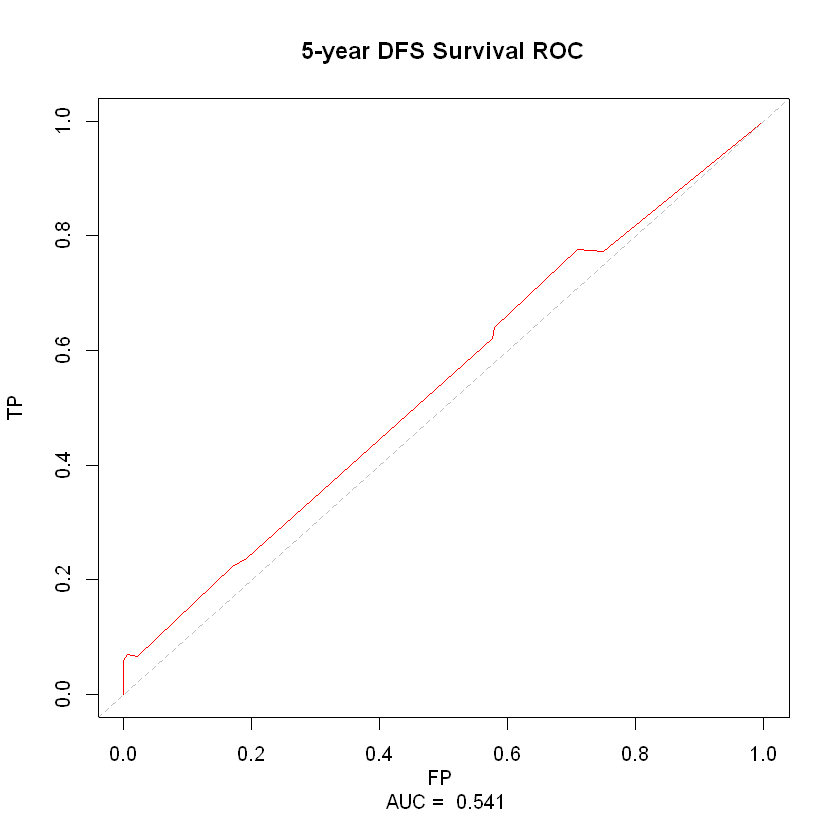

In [48]:
plot(data5$FP, data5$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data5$AUC,3)), 
     ylab="TP",
     main="5-year DFS Survival ROC")
abline(0,1,col="gray",lty=2)

### Radiomics Score

In [49]:
cutoff=1825 #730, 1095, 1825, 2555, 3650
data5= survivalROC(  Stime=data$DFS,##生存时间
                     status=data$Y2,## 终止事件    
                     marker = data$RSDFS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data5)## list结构

List of 6
 $ cut.values  : num [1:384] -Inf -0.795 -0.788 -0.782 -0.746 ...
 $ TP          : num [1:384] 1 0.996 0.993 0.99 0.986 ...
 $ FP          : num [1:384] 1 0.998 0.996 0.994 0.992 ...
 $ predict.time: num 1825
 $ Survival    : num 0.556
 $ AUC         : num 0.528


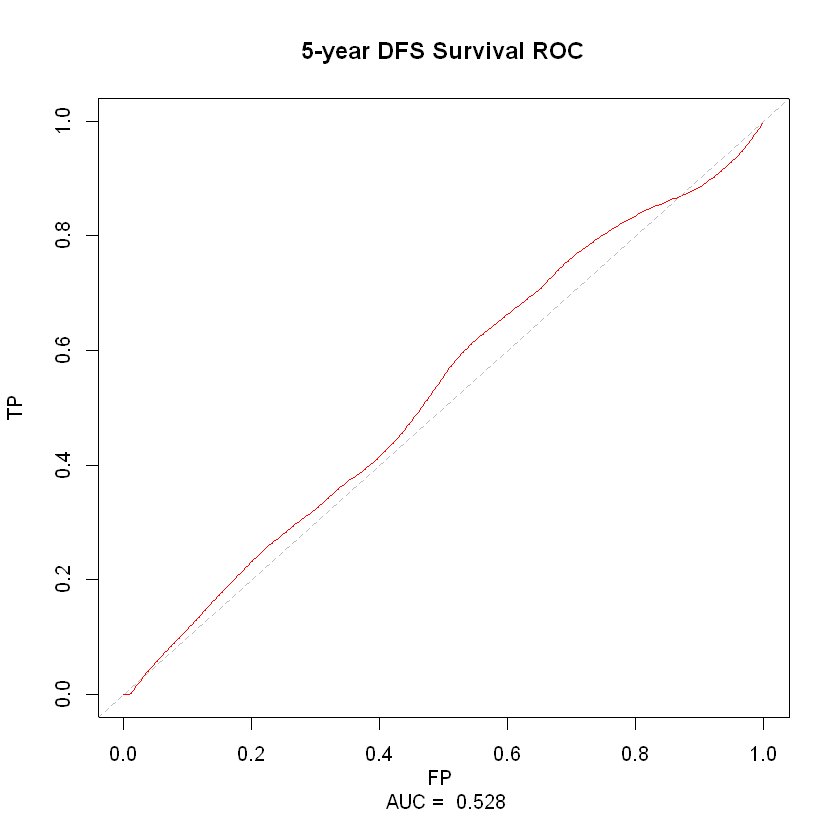

In [50]:
plot(data5$FP, data5$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data5$AUC,3)), ##连接
     ylab="TP",
     main="5-year DFS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [51]:
data5= survivalROC(  Stime=data$DFS,  
                     status=data$Y2,      
                     marker = data$RSDFS,     
                     predict.time =  cutoff, method="KM")
str(data5)

List of 6
 $ cut.values  : num [1:384] -Inf -0.795 -0.788 -0.782 -0.746 ...
 $ TP          : num [1:384] 1 0.993 0.994 0.995 0.995 ...
 $ FP          : num [1:384] 1 1.001 0.995 0.99 0.985 ...
 $ predict.time: num 1825
 $ Survival    : num 0.556
 $ AUC         : num 0.532


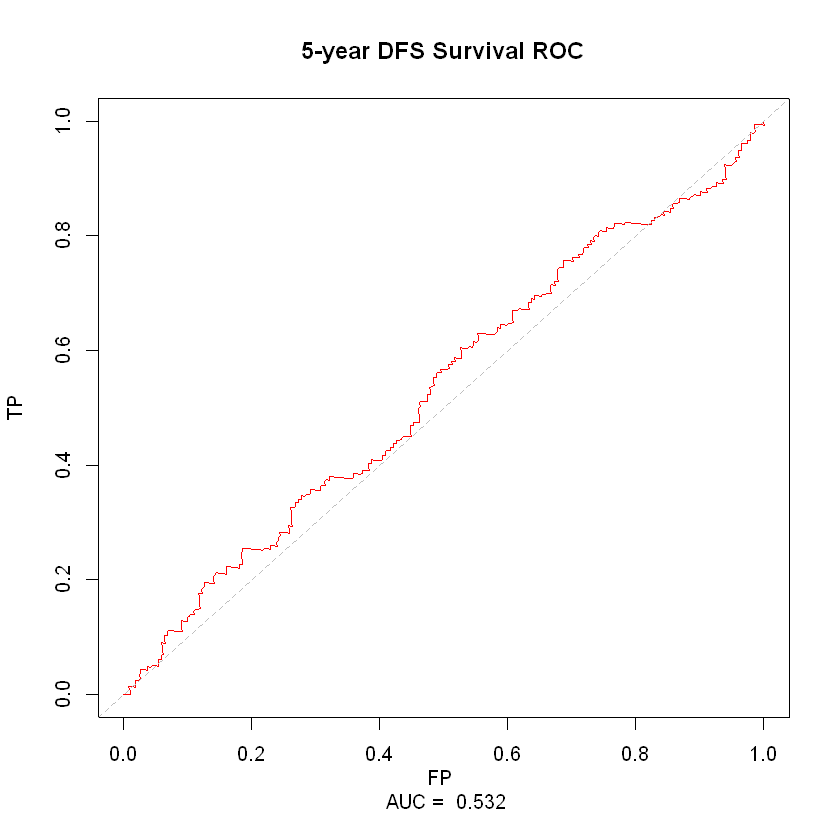

In [52]:
plot(data5$FP, data5$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data5$AUC,3)), 
     ylab="TP",
     main="5-year DFS Survival ROC")
abline(0,1,col="gray",lty=2)

# 7-year OS

### Clinical Score

In [53]:
cutoff=2555 #730, 1095, 1825, 2555, 3650
data7= survivalROC(  Stime=data$OS,##生存时间
                     status=data$Y1,## 终止事件    
                     marker = data$CSOS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data7)## list结构

List of 6
 $ cut.values  : num [1:23] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:23] 1 0.943 0.933 0.907 0.744 ...
 $ FP          : num [1:23] 1 0.927 0.916 0.889 0.718 ...
 $ predict.time: num 2555
 $ Survival    : num 0.213
 $ AUC         : num 0.508


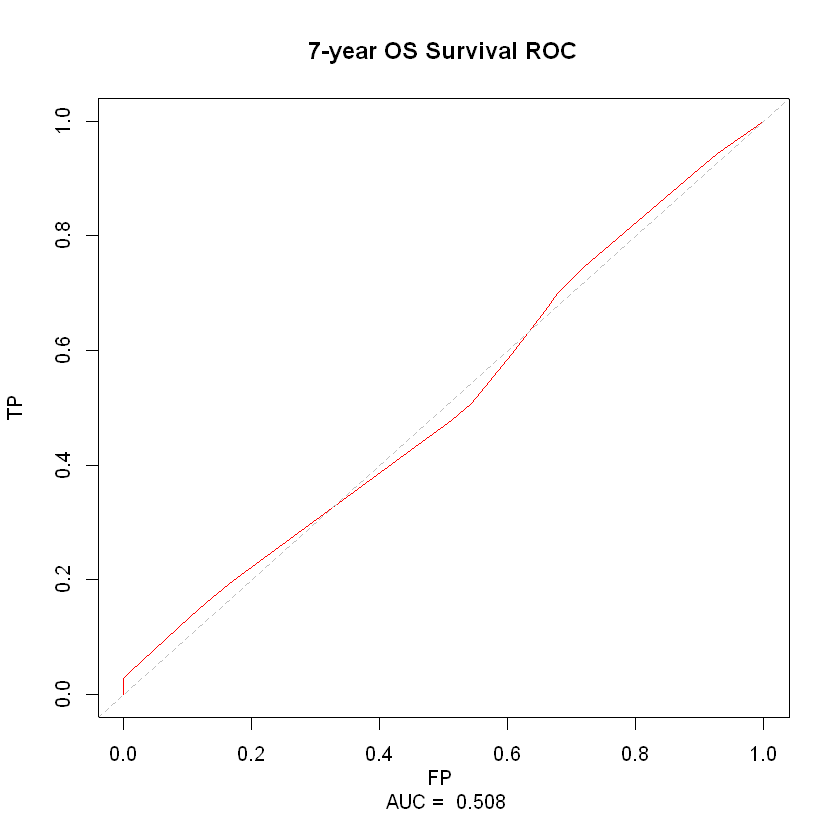

In [54]:
plot(data7$FP, data7$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data7$AUC,3)), ##连接
     ylab="TP",
     main="7-year OS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [55]:
data7= survivalROC(  Stime=data$OS,  
                     status=data$Y1,      
                     marker = data$CSOS,     
                     predict.time =  cutoff, method="KM")
str(data7)

List of 6
 $ cut.values  : num [1:23] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:23] 1 0.94 0.934 0.907 0.743 ...
 $ FP          : num [1:23] 1 0.94 0.913 0.889 0.724 ...
 $ predict.time: num 2555
 $ Survival    : num 0.213
 $ AUC         : num 0.507


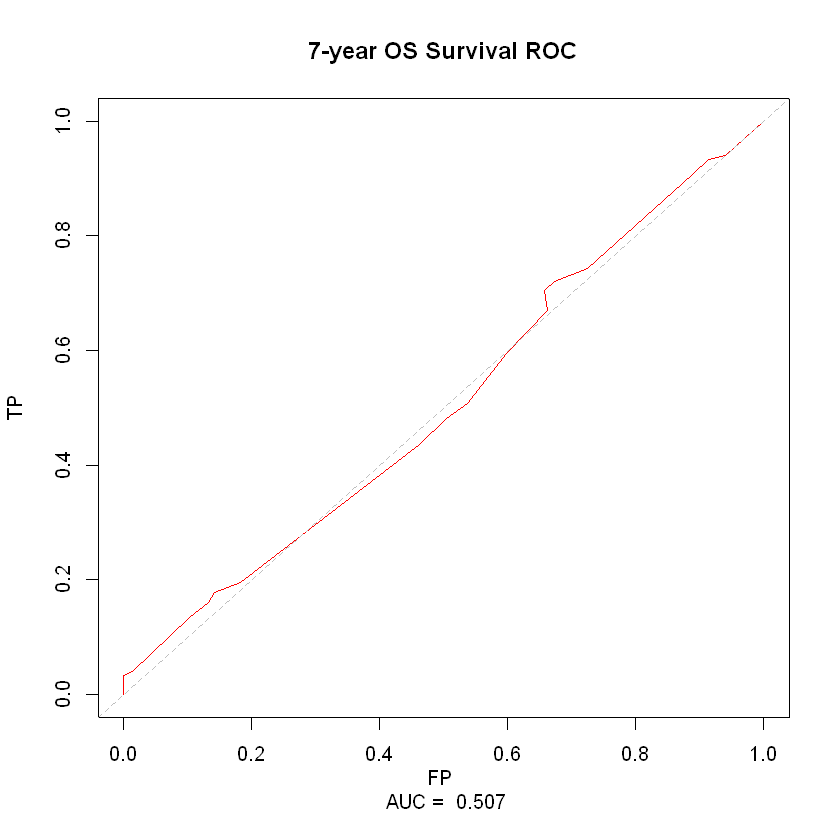

In [56]:
plot(data7$FP, data7$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data7$AUC,3)), 
     ylab="TP",
     main="7-year OS Survival ROC")
abline(0,1,col="gray",lty=2)

### Radiomics Score

In [57]:
cutoff=2555 #730, 1095, 1825, 2555, 3650
data7= survivalROC(  Stime=data$OS,##生存时间
                     status=data$Y1,## 终止事件    
                     marker = data$RSOS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data7)## list结构

List of 6
 $ cut.values  : num [1:384] -Inf -0.572 -0.572 -0.537 -0.525 ...
 $ TP          : num [1:384] 1 0.998 0.995 0.993 0.991 ...
 $ FP          : num [1:384] 1 0.996 0.992 0.989 0.985 ...
 $ predict.time: num 2555
 $ Survival    : num 0.213
 $ AUC         : num 0.495


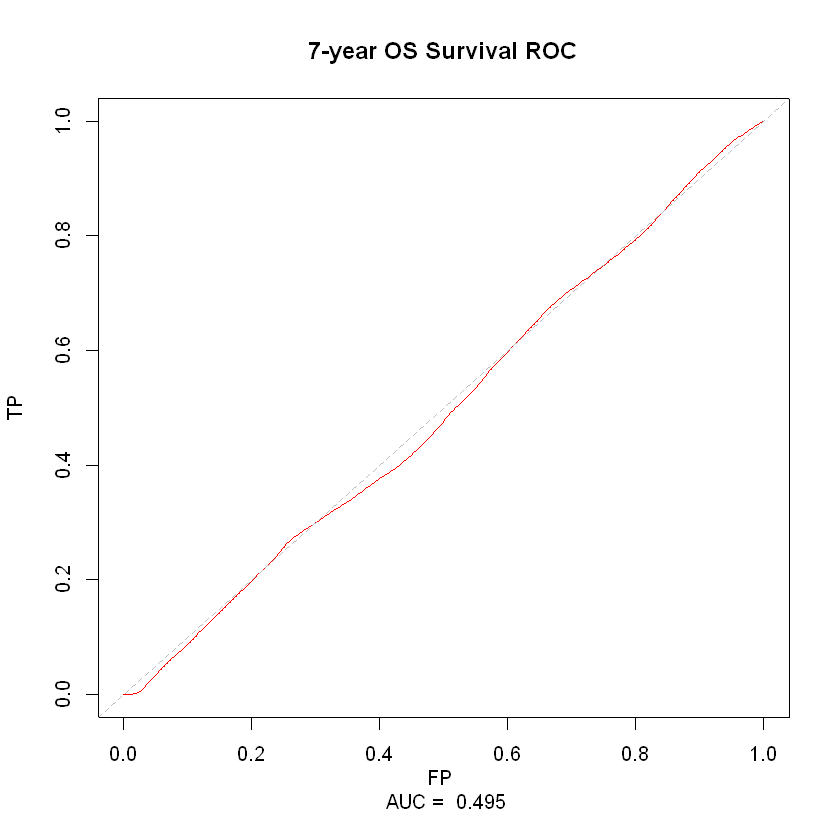

In [58]:
plot(data7$FP, data7$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data7$AUC,3)), ##连接
     ylab="TP",
     main="7-year OS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [59]:
data7= survivalROC(  Stime=data$OS,  
                     status=data$Y1,      
                     marker = data$RSOS,     
                     predict.time =  cutoff, method="KM")
str(data7)

List of 6
 $ cut.values  : num [1:384] -Inf -0.572 -0.572 -0.537 -0.525 ...
 $ TP          : num [1:384] 1 0.997 0.997 0.997 0.994 ...
 $ FP          : num [1:384] 1 1 0.986 0.973 0.973 ...
 $ predict.time: num 2555
 $ Survival    : num 0.213
 $ AUC         : num 0.515


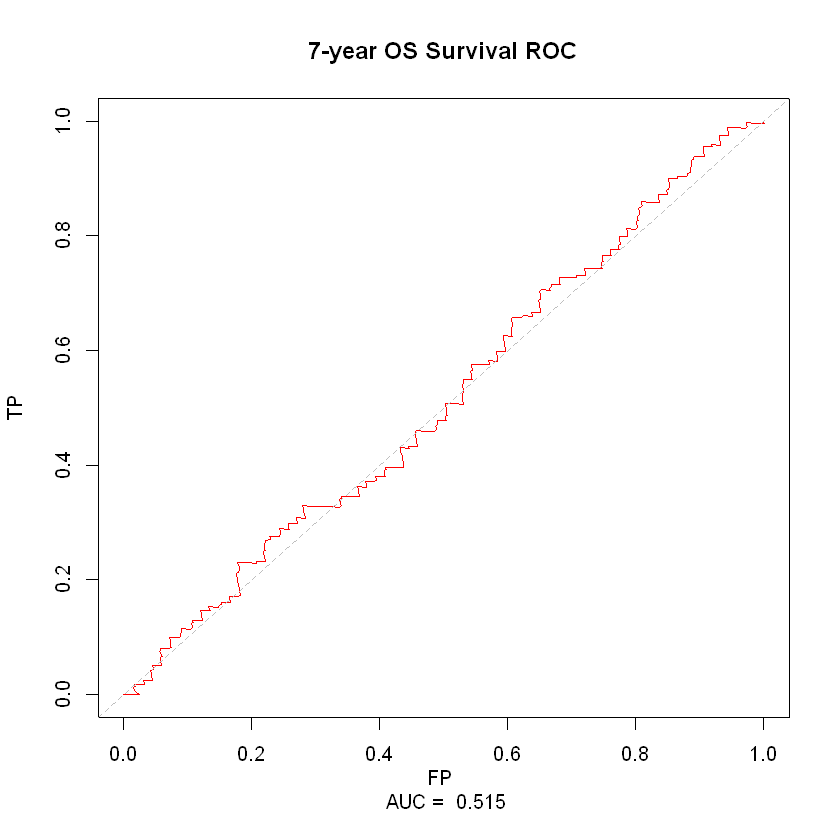

In [60]:
plot(data7$FP, data7$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data7$AUC,3)), 
     ylab="TP",
     main="7-year OS Survival ROC")
abline(0,1,col="gray",lty=2)

# 7-year DFS

### Clinical Score

In [61]:
cutoff=2555 #730, 1095, 1825, 2555, 3650
data7= survivalROC(  Stime=data$DFS,##生存时间
                     status=data$Y2,## 终止事件    
                     marker = data$CSDFS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data7)## list结构

List of 6
 $ cut.values  : num [1:13] -Inf -0.2625 -0.2223 -0.1047 -0.0645 ...
 $ TP          : num [1:13] 1 0.755 0.735 0.61 0.6 ...
 $ FP          : num [1:13] 1 0.778 0.754 0.588 0.577 ...
 $ predict.time: num 2555
 $ Survival    : num 0.218
 $ AUC         : num 0.52


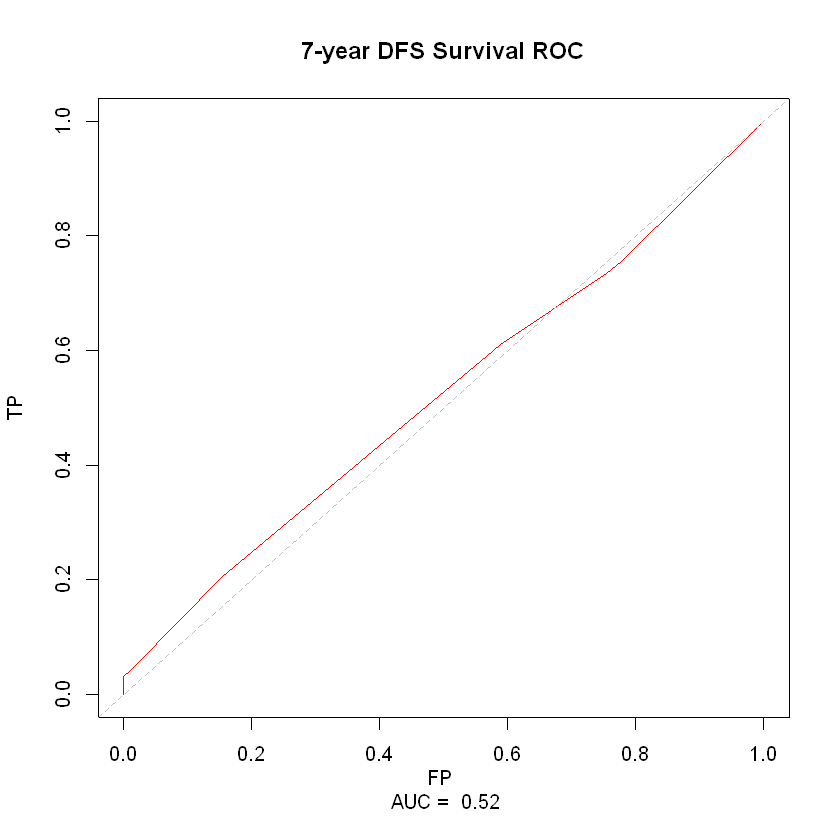

In [62]:
plot(data7$FP, data7$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data7$AUC,3)), ##连接
     ylab="TP",
     main="7-year DFS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [63]:
data7= survivalROC(  Stime=data$DFS,  
                     status=data$Y2,      
                     marker = data$CSDFS,     
                     predict.time =  cutoff, method="KM")
str(data7)

List of 6
 $ cut.values  : num [1:13] -Inf -0.2625 -0.2223 -0.1047 -0.0645 ...
 $ TP          : num [1:13] 1 0.752 0.741 0.615 0.601 ...
 $ FP          : num [1:13] 1 0.786 0.732 0.571 0.574 ...
 $ predict.time: num 2555
 $ Survival    : num 0.218
 $ AUC         : num 0.517


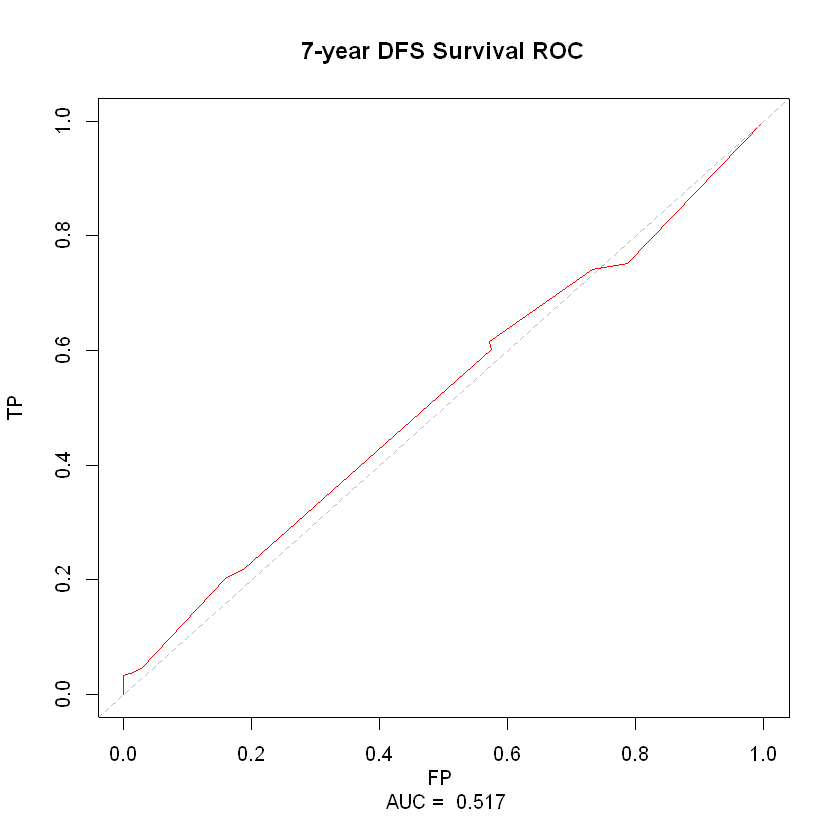

In [64]:
plot(data7$FP, data7$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data7$AUC,3)), 
     ylab="TP",
     main="7-year DFS Survival ROC")
abline(0,1,col="gray",lty=2)

### Radiomics Score

In [65]:
cutoff=2555 #730, 1095, 1825, 2555, 3650
data7= survivalROC(  Stime=data$DFS,##生存时间
                     status=data$Y2,## 终止事件    
                     marker = data$RSDFS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data7)## list结构

List of 6
 $ cut.values  : num [1:384] -Inf -0.795 -0.788 -0.782 -0.746 ...
 $ TP          : num [1:384] 1 0.998 0.995 0.993 0.99 ...
 $ FP          : num [1:384] 1 0.997 0.994 0.991 0.988 ...
 $ predict.time: num 2555
 $ Survival    : num 0.218
 $ AUC         : num 0.554


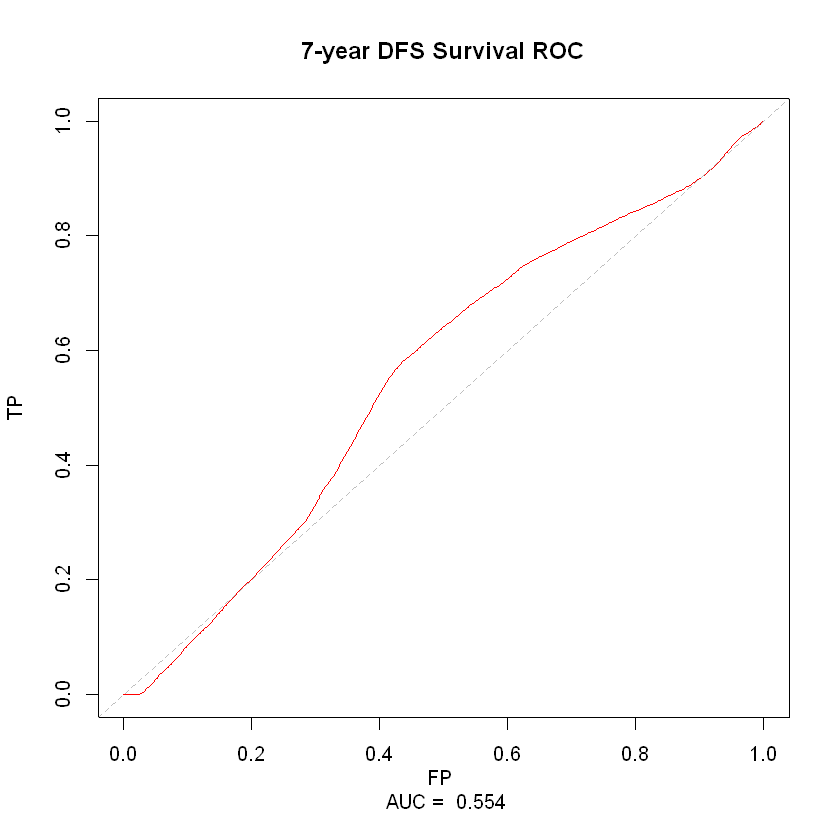

In [66]:
plot(data7$FP, data7$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data7$AUC,3)), ##连接
     ylab="TP",
     main="7-year DFS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [67]:
data7= survivalROC(  Stime=data$DFS,  
                     status=data$Y2,      
                     marker = data$RSDFS,     
                     predict.time =  cutoff, method="KM")
str(data7)

List of 6
 $ cut.values  : num [1:384] -Inf -0.795 -0.788 -0.782 -0.746 ...
 $ TP          : num [1:384] 1 0.997 0.997 0.994 0.994 ...
 $ FP          : num [1:384] 1 1.001 0.986 0.987 0.973 ...
 $ predict.time: num 2555
 $ Survival    : num 0.218
 $ AUC         : num 0.569


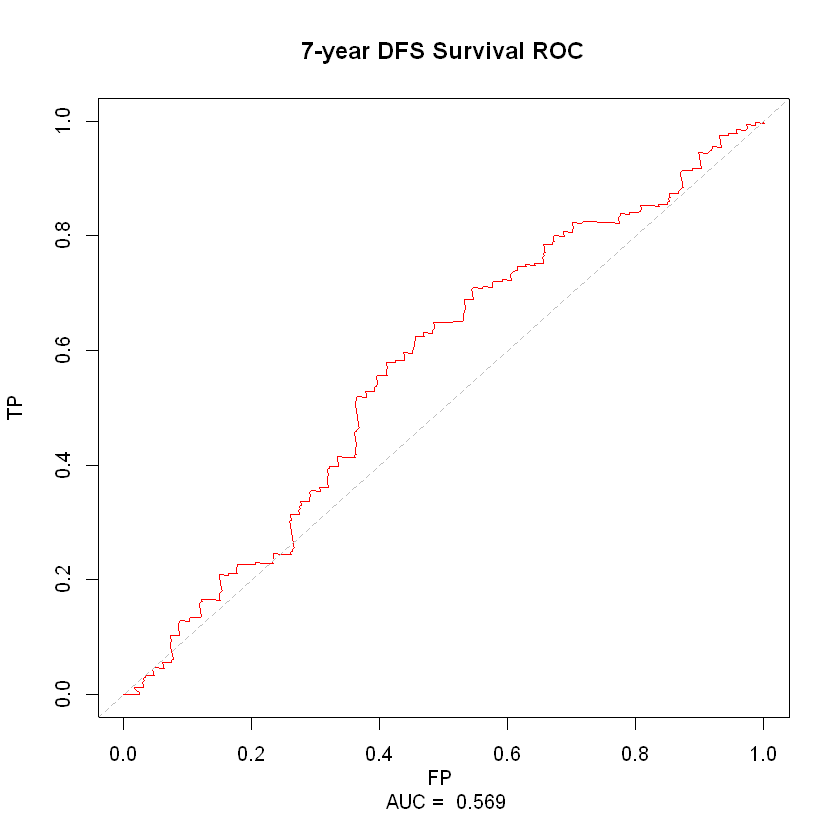

In [68]:
plot(data7$FP, data7$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data7$AUC,3)), 
     ylab="TP",
     main="7-year DFS Survival ROC")
abline(0,1,col="gray",lty=2)

# 10-year OS

### Clinical Score

In [69]:
cutoff=3650 #730, 1095, 1825, 2555, 3650
data10= survivalROC(  Stime=data$OS,##生存时间
                     status=data$Y1,## 终止事件    
                     marker = data$CSOS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data10)## list结构

List of 6
 $ cut.values  : num [1:23] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:23] 1 0.94 0.929 0.903 0.737 ...
 $ FP          : num [1:23] 1 1 1 1 1 ...
 $ predict.time: num 3650
 $ Survival    : num 0.00617
 $ AUC         : num 0.477


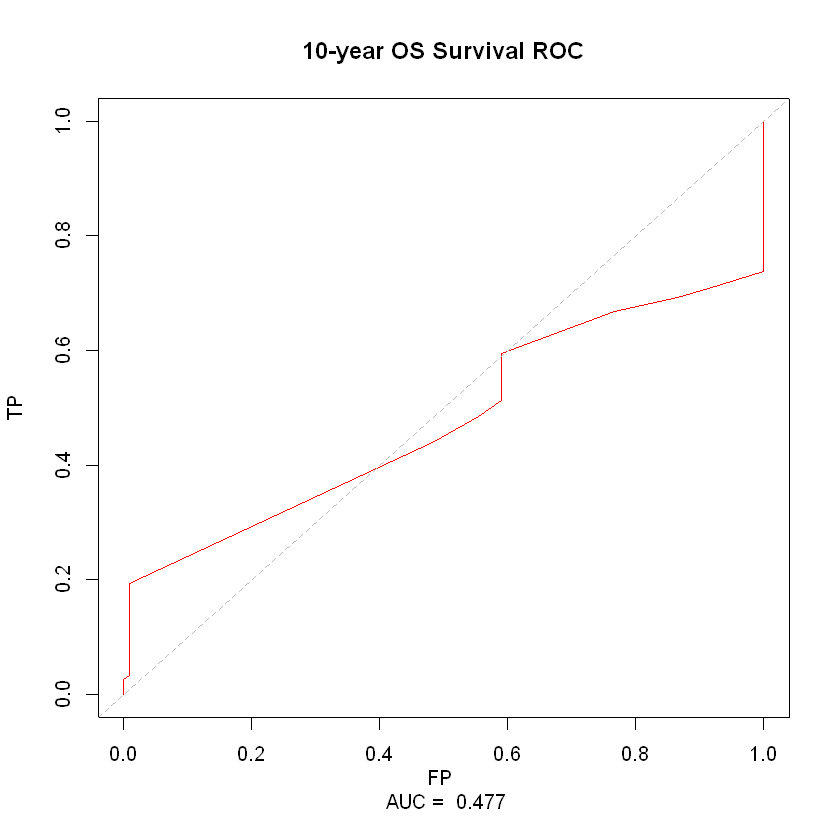

In [70]:
plot(data10$FP, data10$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data10$AUC,3)), ##连接
     ylab="TP",
     main="10-year OS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [71]:
data10= survivalROC(  Stime=data$OS,  
                     status=data$Y1,      
                     marker = data$CSOS,     
                     predict.time =  cutoff, method="KM")
str(data10)

List of 6
 $ cut.values  : num [1:23] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:23] 1 0.94 0.929 0.903 0.737 ...
 $ FP          : num [1:23] 1 0.997 1 0.989 0.98 ...
 $ predict.time: num 3650
 $ Survival    : num 0.00617
 $ AUC         : num 0.516


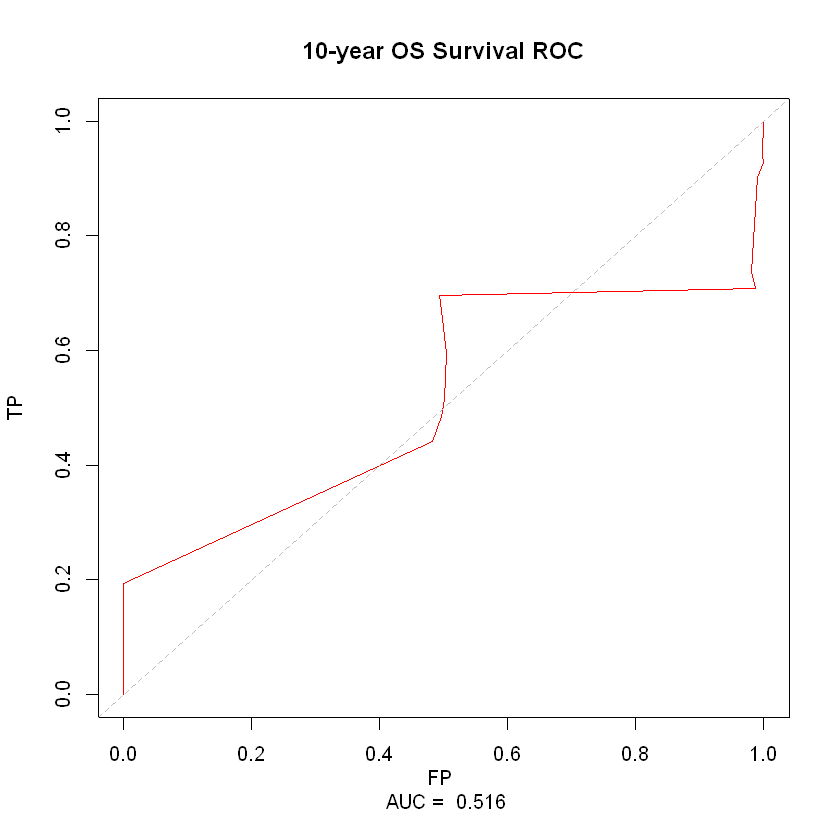

In [72]:
plot(data10$FP, data10$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data10$AUC,3)), 
     ylab="TP",
     main="10-year OS Survival ROC")
abline(0,1,col="gray",lty=2)

### Radiomics Score

In [73]:
cutoff=3650 #730, 1095, 1825, 2555, 3650
data10= survivalROC(  Stime=data$OS,##生存时间
                     status=data$Y1,## 终止事件    
                     marker = data$RSOS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data10)## list结构

List of 6
 $ cut.values  : num [1:384] -Inf -0.572 -0.572 -0.537 -0.525 ...
 $ TP          : num [1:384] 1 0.997 0.995 0.992 0.99 ...
 $ FP          : num [1:384] 1 0.991 0.982 0.973 0.964 ...
 $ predict.time: num 3650
 $ Survival    : num 0.00617
 $ AUC         : num 0.465


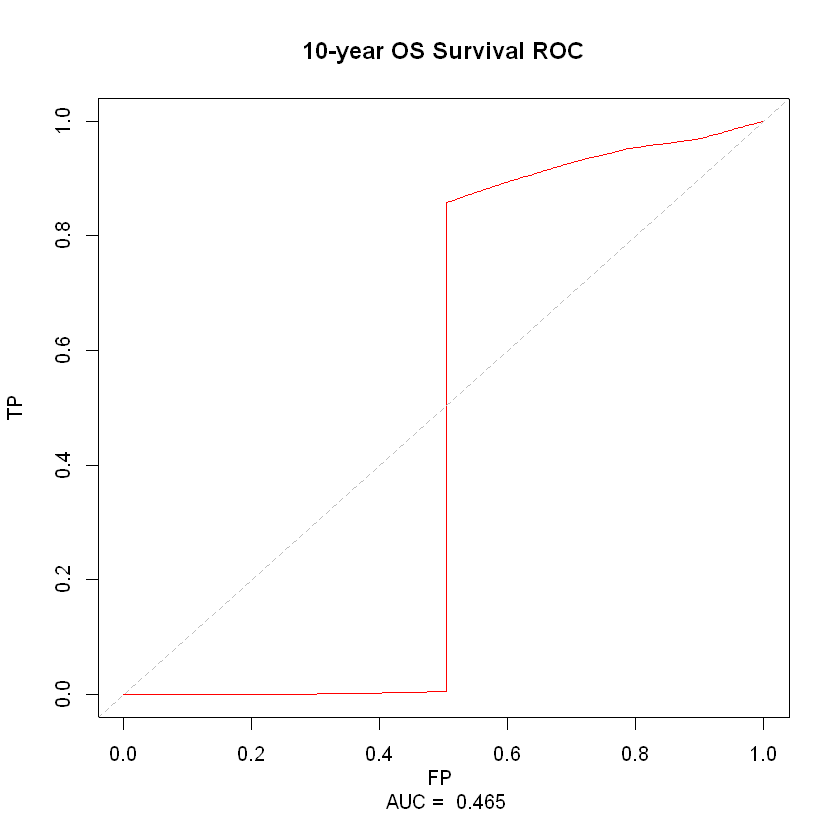

In [74]:
plot(data10$FP, data10$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data10$AUC,3)), ##连接
     ylab="TP",
     main="10-year OS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [75]:
data10= survivalROC(  Stime=data$OS,  
                     status=data$Y1,      
                     marker = data$RSOS,     
                     predict.time =  cutoff, method="KM")
str(data10)

List of 6
 $ cut.values  : num [1:384] -Inf -0.572 -0.572 -0.537 -0.525 ...
 $ TP          : num [1:384] 1 0.997 0.995 0.992 0.989 ...
 $ FP          : num [1:384] 1 1 1 1 1 ...
 $ predict.time: num 3650
 $ Survival    : num 0.00617
 $ AUC         : num 0.921


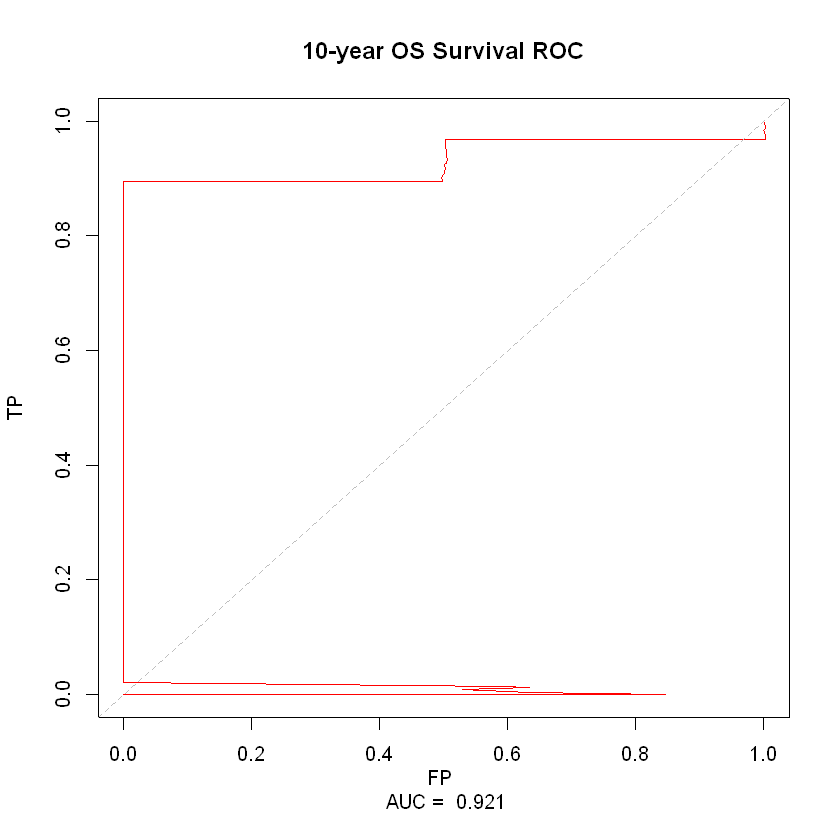

In [76]:
plot(data10$FP, data10$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data10$AUC,3)), 
     ylab="TP",
     main="10-year OS Survival ROC")
abline(0,1,col="gray",lty=2)

# 10-year DFS

### Clinical Score

In [77]:
cutoff=3650 #730, 1095, 1825, 2555, 3650
data10= survivalROC( Stime=data$DFS,##生存时间
                     status=data$Y2,## 终止事件    
                     marker = data$CSDFS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data10)## list结构

List of 6
 $ cut.values  : num [1:13] -Inf -0.2625 -0.2223 -0.1047 -0.0645 ...
 $ TP          : num [1:13] 1 0.758 0.737 0.606 0.596 ...
 $ FP          : num [1:13] 1 1 0.977 0.523 0.505 ...
 $ predict.time: num 3650
 $ Survival    : num 0.00692
 $ AUC         : num 0.529


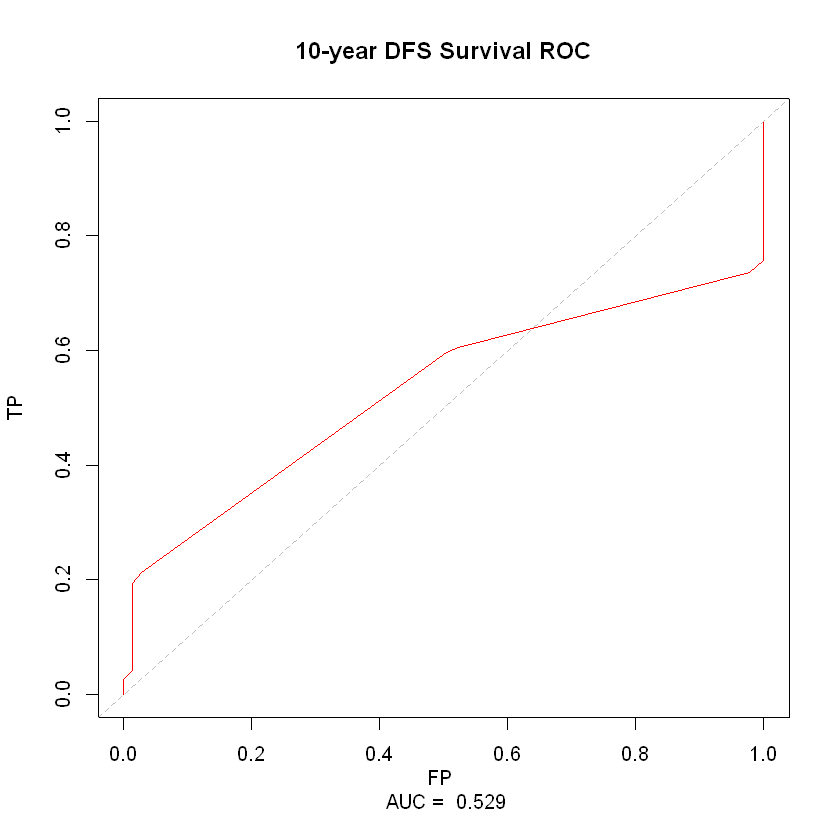

In [78]:
plot(data10$FP, data10$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data10$AUC,3)), ##连接
     ylab="TP",
     main="10-year DFS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [79]:
data10= survivalROC( Stime=data$DFS,  
                     status=data$Y2,      
                     marker = data$CSDFS,     
                     predict.time =  cutoff, method="KM")
str(data10)

List of 6
 $ cut.values  : num [1:13] -Inf -0.2625 -0.2223 -0.1047 -0.0645 ...
 $ TP          : num [1:13] 1 0.758 0.737 0.606 0.596 ...
 $ FP          : num [1:13] 1 0.998 1.01 0.5 0.502 ...
 $ predict.time: num 3650
 $ Survival    : num 0.00692
 $ AUC         : num 0.537


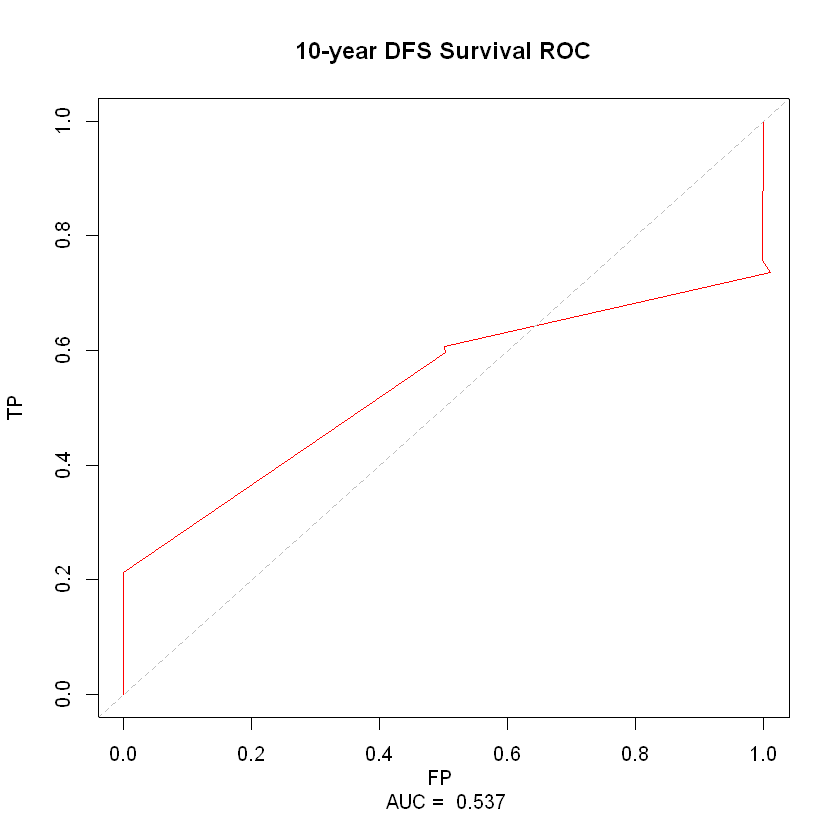

In [80]:
plot(data10$FP, data10$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data10$AUC,3)), 
     ylab="TP",
     main="10-year DFS Survival ROC")
abline(0,1,col="gray",lty=2)

### Radiomics Score

In [81]:
cutoff=3650 #730, 1095, 1825, 2555, 3650
data10= survivalROC(  Stime=data$DFS,##生存时间
                     status=data$Y2,## 终止事件    
                     marker = data$RSDFS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data10)## list结构

List of 6
 $ cut.values  : num [1:384] -Inf -0.795 -0.788 -0.782 -0.746 ...
 $ TP          : num [1:384] 1 0.998 0.995 0.993 0.99 ...
 $ FP          : num [1:384] 1 0.972 0.945 0.918 0.893 ...
 $ predict.time: num 3650
 $ Survival    : num 0.00692
 $ AUC         : num 0.611


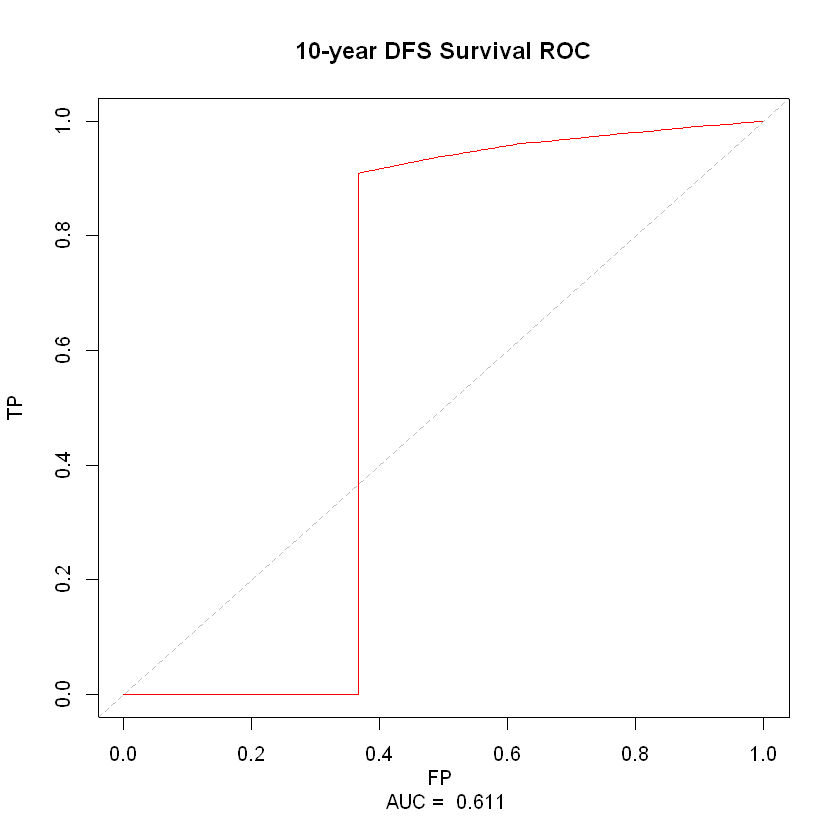

In [82]:
plot(data10$FP, data10$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data10$AUC,3)), ##连接
     ylab="TP",
     main="10-year DFS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [83]:
data10= survivalROC(  Stime=data$DFS,  
                     status=data$Y2,      
                     marker = data$RSDFS,     
                     predict.time =  cutoff, method="KM")
str(data10)

List of 6
 $ cut.values  : num [1:384] -Inf -0.795 -0.788 -0.782 -0.746 ...
 $ TP          : num [1:384] 1 0.997 0.995 0.992 0.989 ...
 $ FP          : num [1:384] 1 1 1 1 1.01 ...
 $ predict.time: num 3650
 $ Survival    : num 0.00692
 $ AUC         : num 0.96


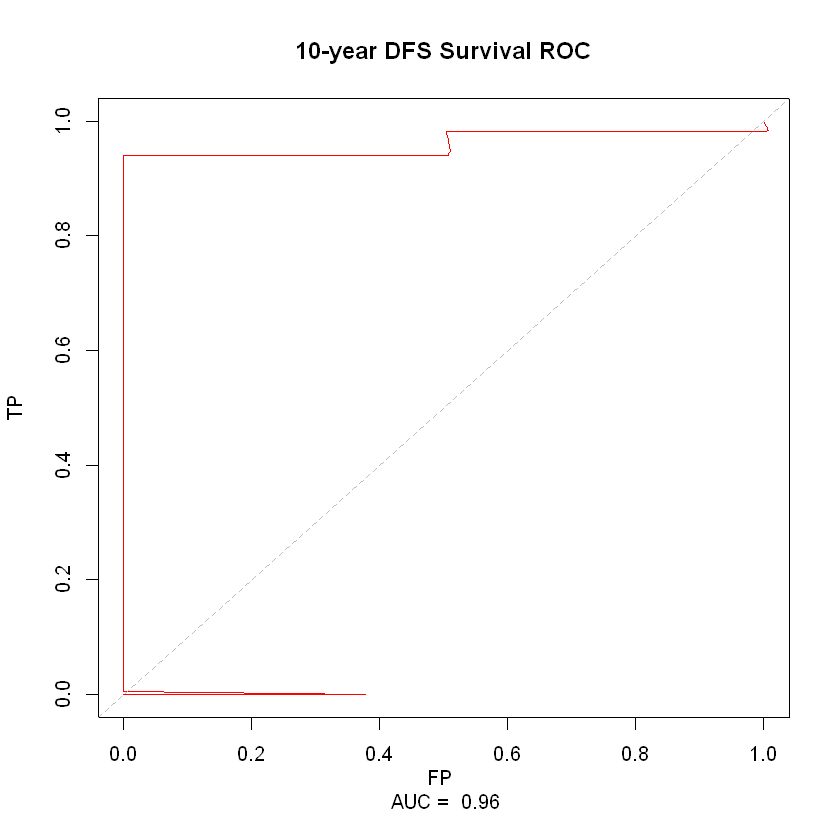

In [84]:
plot(data10$FP, data10$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data10$AUC,3)), 
     ylab="TP",
     main="10-year DFS Survival ROC")
abline(0,1,col="gray",lty=2)